# EDA

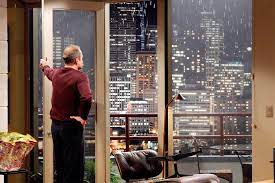

#### Problem 

I have a dataset from the King County housing market. 
The goal is to get a proper overview of the market
- *at least 3 insights* of the overall data
- *one should be geographical*

Additionally, I have a client, William Rodriguez, who is looking for *2 houses* for his wife and himself:
- *countryside (best timing & non-renovated)* 
- *city (fast & central location)*

#### 1. set up environment 

done in terminal: 
```pyenv local 3.9.8
python -m venv .venv
source .venv/bin/activate
pip install --upgrade pip
pip install -r requirements.txt
```


#### 2. load packages and set plot style 

In [98]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
from datetime import datetime, date, time, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Floats (decimal numbers) should be displayed rounded with 2 decimal places
pd.options.display.float_format = "{:,.2f}".format

#### 3. import data

In [99]:
df_housing = pd.read_csv('data/data_housingmarket.csv')

Column Names and descriptions for King County Data Set

- **id** - unique identifier for a house
- **date** - house was sold
- **price** - is prediction target
- **bedrooms** - # of bedrooms
- **bathrooms** - # of bathrooms
- **sqft_living** - footage of the home
- **sqft_lot** - footage of the lot
- **floors** - floors (levels) in house
- **waterfront** - House which has a view to a waterfront
- **view** - Rating of the view from the property
- **condition** - How good the condition is ( overall )
- **grade** - overall grade given to the housing unit, based on King County grading system
- **sqft_above** - square footage of house apart from basement
- **sqft_basement** - square footage of the basement
- **yr_built** - Built Year
- **yr_renovated** - Year when house was renovated
- **zipcode** - zip
- **lat** - Latitude coordinate
- **long** - Longitude coordinate
- **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
- **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

#### 4. get first impression of and prepare data

In [100]:
##check shape 
df_housing.shape
#21597 rows, 21 columns

(21597, 21)

In [101]:
## have a look at head and tail 
df_housing.head()
df_housing.tail()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
21592,9842300095,5.00,2.00,"1,600.00","4,168.00",1.50,0.00,0.00,3,7,...,0.00,1927,0.00,98126,47.53,-122.38,"1,190.00","4,168.00",2014-07-25,"365,000.00"
21593,9842300485,2.00,1.00,"1,040.00","7,372.00",1.00,0.00,0.00,5,7,...,200.00,1939,0.00,98126,47.53,-122.38,"1,930.00","5,150.00",2015-03-11,"380,000.00"
21594,9842300540,3.00,1.00,"1,100.00","4,128.00",1.00,0.00,0.00,4,7,...,380.00,1942,NaN,98126,47.53,-122.38,"1,510.00","4,538.00",2014-06-24,"339,000.00"
21595,9895000040,2.00,1.75,"1,410.00","1,005.00",1.50,0.00,0.00,3,9,...,510.00,2011,0.00,98027,47.54,-122.02,"1,440.00","1,188.00",2014-07-03,"399,900.00"
21596,9900000190,3.00,1.00,"1,320.00","8,100.00",1.00,0.00,0.00,3,6,...,440.00,1943,NaN,98166,47.47,-122.35,"1,000.00","8,100.00",2014-10-30,"268,950.00"


observations: 
- 'waterfront' has either missing values or NaN corresponds to 1=is at waterfront 
- Some duplicates when houses were sold several times
    - just keep the latest info?
- 'yr_renovated' has some NaNs and 0.000 --> possibly erroreous column? 
- 'sqft_basement' sometimes 0.000 --> might correspond to houses at the waterfront (as they often don't build basements there) 


In [102]:
df_housing.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,"21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","19,206.00","21,534.00","21,597.00","21,597.00","21,597.00","21,145.00","21,597.00","17,749.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00"
mean,"4,580,474,287.77",3.37,2.12,"2,080.32","15,099.41",1.49,0.01,0.23,3.41,7.66,"1,788.60",291.86,"1,971.00",836.65,"98,077.95",47.56,-122.21,"1,986.62","12,758.28","540,296.57"
std,"2,876,735,715.75",0.93,0.77,918.11,"41,412.64",0.54,0.09,0.77,0.65,1.17,827.76,442.49,29.38,"4,000.11",53.51,0.14,0.14,685.23,"27,274.44","367,368.14"
min,"1,000,102.00",1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,0.00,"1,900.00",0.00,"98,001.00",47.16,-122.52,399.00,651.00,"78,000.00"
25%,"2,123,049,175.00",3.00,1.75,"1,430.00","5,040.00",1.00,0.00,0.00,3.00,7.00,"1,190.00",0.00,"1,951.00",0.00,"98,033.00",47.47,-122.33,"1,490.00","5,100.00","322,000.00"
50%,"3,904,930,410.00",3.00,2.25,"1,910.00","7,618.00",1.50,0.00,0.00,3.00,7.00,"1,560.00",0.00,"1,975.00",0.00,"98,065.00",47.57,-122.23,"1,840.00","7,620.00","450,000.00"
75%,"7,308,900,490.00",4.00,2.50,"2,550.00","10,685.00",2.00,0.00,0.00,4.00,8.00,"2,210.00",560.00,"1,997.00",0.00,"98,118.00",47.68,-122.12,"2,360.00","10,083.00","645,000.00"
max,"9,900,000,190.00",33.00,8.00,"13,540.00","1,651,359.00",3.50,1.00,4.00,5.00,13.00,"9,410.00","4,820.00","2,015.00","20,150.00","98,199.00",47.78,-121.31,"6,210.00","871,200.00","7,700,000.00"


'yr_renovated' has weird numbers, seems like a comma is misplaced there. 
Will divide it by 10 to correct

In [103]:
## get info about each column
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

- 'zip-code' could be a string?
- yr_built, yr_renovated and date should have datatype to datetime 

In [104]:
## check for missing values 
df_housing.isnull().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
dtype: int64

In [105]:
# missing values in %
df_housing.isnull().sum() / df_housing.shape[0]*100

id               0.00
bedrooms         0.00
bathrooms        0.00
sqft_living      0.00
sqft_lot         0.00
floors           0.00
waterfront      11.07
view             0.29
condition        0.00
grade            0.00
sqft_above       0.00
sqft_basement    2.09
yr_built         0.00
yr_renovated    17.82
zipcode          0.00
lat              0.00
long             0.00
sqft_living15    0.00
sqft_lot15       0.00
date             0.00
price            0.00
dtype: float64

observations: 
- missing data for 'waterfront', 'view', 'sqft_basement', 'yr_renovated'

In [106]:
##change data type of date column to datetime

# change 'date' to Y-m-d datetime data type
df_housing['date'] = pd.to_datetime(df_housing['date'], format = '%Y-%m-%d')
type(df_housing['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [107]:
df_housing['yr_renovated'].nunique()

70

In [108]:
# dispaly rows with yr_renovated = 0
df_housing.query('yr_renovated == 0')

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,1000102,6.00,3.00,"2,400.00","9,373.00",2.00,NaN,0.00,3,7,...,0.00,1991,0.00,98002,47.33,-122.21,"2,060.00","7,316.00",2015-04-22,"300,000.00"
1,1000102,6.00,3.00,"2,400.00","9,373.00",2.00,NaN,0.00,3,7,...,0.00,1991,0.00,98002,47.33,-122.21,"2,060.00","7,316.00",2014-09-16,"280,000.00"
2,1200019,4.00,1.75,"2,060.00","26,036.00",1.00,NaN,0.00,4,8,...,900.00,1947,0.00,98166,47.44,-122.35,"2,590.00","21,891.00",2014-05-08,"647,500.00"
3,1200021,3.00,1.00,"1,460.00","43,000.00",1.00,0.00,0.00,3,7,...,0.00,1952,0.00,98166,47.44,-122.35,"2,250.00","20,023.00",2014-08-11,"400,000.00"
4,2800031,3.00,1.00,"1,430.00","7,599.00",1.50,0.00,0.00,4,6,...,420.00,1930,0.00,98168,47.48,-122.27,"1,290.00","10,320.00",2015-04-01,"235,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21590,9839301165,2.00,1.00,"1,570.00","4,400.00",1.50,0.00,0.00,4,8,...,0.00,1914,0.00,98122,47.61,-122.29,"1,850.00","4,400.00",2014-10-01,"998,500.00"
21591,9842300036,3.00,1.00,"1,310.00","4,163.00",1.00,0.00,0.00,4,7,...,0.00,1964,0.00,98126,47.53,-122.38,"1,120.00","4,166.00",2014-10-08,"415,885.00"
21592,9842300095,5.00,2.00,"1,600.00","4,168.00",1.50,0.00,0.00,3,7,...,0.00,1927,0.00,98126,47.53,-122.38,"1,190.00","4,168.00",2014-07-25,"365,000.00"
21593,9842300485,2.00,1.00,"1,040.00","7,372.00",1.00,0.00,0.00,5,7,...,200.00,1939,0.00,98126,47.53,-122.38,"1,930.00","5,150.00",2015-03-11,"380,000.00"


That's 17005 rows without info about the renovation. Will assume 0 == no renovation took place. Will recode it to NaN. 

In [109]:
## recode yr_renovated = 0 to NaN and then change data type to datetime
#df_housing['yr_renovated'] = df_housing['yr_renovated'].replace({'0':np.nan, 0:np.nan})
df_housing['yr_renovated'].head()

df_housing['yr_renovated'].isnull().sum()
# now 20853 missing values --> renovation info only for 744 houses (for sure)
df_housing['yr_renovated'].nunique()
df_housing.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,"21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","19,206.00","21,534.00","21,597.00","21,597.00","21,597.00","21,145.00","21,597.00","17,749.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00"
mean,"4,580,474,287.77",3.37,2.12,"2,080.32","15,099.41",1.49,0.01,0.23,3.41,7.66,"1,788.60",291.86,"1,971.00",836.65,"98,077.95",47.56,-122.21,"1,986.62","12,758.28","540,296.57"
std,"2,876,735,715.75",0.93,0.77,918.11,"41,412.64",0.54,0.09,0.77,0.65,1.17,827.76,442.49,29.38,"4,000.11",53.51,0.14,0.14,685.23,"27,274.44","367,368.14"
min,"1,000,102.00",1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,0.00,"1,900.00",0.00,"98,001.00",47.16,-122.52,399.00,651.00,"78,000.00"
25%,"2,123,049,175.00",3.00,1.75,"1,430.00","5,040.00",1.00,0.00,0.00,3.00,7.00,"1,190.00",0.00,"1,951.00",0.00,"98,033.00",47.47,-122.33,"1,490.00","5,100.00","322,000.00"
50%,"3,904,930,410.00",3.00,2.25,"1,910.00","7,618.00",1.50,0.00,0.00,3.00,7.00,"1,560.00",0.00,"1,975.00",0.00,"98,065.00",47.57,-122.23,"1,840.00","7,620.00","450,000.00"
75%,"7,308,900,490.00",4.00,2.50,"2,550.00","10,685.00",2.00,0.00,0.00,4.00,8.00,"2,210.00",560.00,"1,997.00",0.00,"98,118.00",47.68,-122.12,"2,360.00","10,083.00","645,000.00"
max,"9,900,000,190.00",33.00,8.00,"13,540.00","1,651,359.00",3.50,1.00,4.00,5.00,13.00,"9,410.00","4,820.00","2,015.00","20,150.00","98,199.00",47.78,-121.31,"6,210.00","871,200.00","7,700,000.00"


In [110]:
## Divide 'yr_renovated' by 10
df_housing['yr_renovated']=df_housing['yr_renovated']/10
df_housing.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,"21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","19,206.00","21,534.00","21,597.00","21,597.00","21,597.00","21,145.00","21,597.00","17,749.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00"
mean,"4,580,474,287.77",3.37,2.12,"2,080.32","15,099.41",1.49,0.01,0.23,3.41,7.66,"1,788.60",291.86,"1,971.00",83.67,"98,077.95",47.56,-122.21,"1,986.62","12,758.28","540,296.57"
std,"2,876,735,715.75",0.93,0.77,918.11,"41,412.64",0.54,0.09,0.77,0.65,1.17,827.76,442.49,29.38,400.01,53.51,0.14,0.14,685.23,"27,274.44","367,368.14"
min,"1,000,102.00",1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,0.00,"1,900.00",0.00,"98,001.00",47.16,-122.52,399.00,651.00,"78,000.00"
25%,"2,123,049,175.00",3.00,1.75,"1,430.00","5,040.00",1.00,0.00,0.00,3.00,7.00,"1,190.00",0.00,"1,951.00",0.00,"98,033.00",47.47,-122.33,"1,490.00","5,100.00","322,000.00"
50%,"3,904,930,410.00",3.00,2.25,"1,910.00","7,618.00",1.50,0.00,0.00,3.00,7.00,"1,560.00",0.00,"1,975.00",0.00,"98,065.00",47.57,-122.23,"1,840.00","7,620.00","450,000.00"
75%,"7,308,900,490.00",4.00,2.50,"2,550.00","10,685.00",2.00,0.00,0.00,4.00,8.00,"2,210.00",560.00,"1,997.00",0.00,"98,118.00",47.68,-122.12,"2,360.00","10,083.00","645,000.00"
max,"9,900,000,190.00",33.00,8.00,"13,540.00","1,651,359.00",3.50,1.00,4.00,5.00,13.00,"9,410.00","4,820.00","2,015.00","2,015.00","98,199.00",47.78,-121.31,"6,210.00","871,200.00","7,700,000.00"


In [111]:
## Now, try to convert to datetime data type again
#df_housing['yr_renovated'] = pd.to_datetime(df_housing['yr_renovated'], format = '%Y')
type(df_housing['yr_renovated'][0])

numpy.float64

Data type of yr_renovated is now 'NaTType' which means it's 'Not a Time', as there are a lot of missing values. But the other values should be of datetime now. 

In [112]:
df_housing.describe()
#since yr_renovated is not included in the output anymore, changing the date type worked!

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,"21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","19,206.00","21,534.00","21,597.00","21,597.00","21,597.00","21,145.00","21,597.00","17,749.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00"
mean,"4,580,474,287.77",3.37,2.12,"2,080.32","15,099.41",1.49,0.01,0.23,3.41,7.66,"1,788.60",291.86,"1,971.00",83.67,"98,077.95",47.56,-122.21,"1,986.62","12,758.28","540,296.57"
std,"2,876,735,715.75",0.93,0.77,918.11,"41,412.64",0.54,0.09,0.77,0.65,1.17,827.76,442.49,29.38,400.01,53.51,0.14,0.14,685.23,"27,274.44","367,368.14"
min,"1,000,102.00",1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,0.00,"1,900.00",0.00,"98,001.00",47.16,-122.52,399.00,651.00,"78,000.00"
25%,"2,123,049,175.00",3.00,1.75,"1,430.00","5,040.00",1.00,0.00,0.00,3.00,7.00,"1,190.00",0.00,"1,951.00",0.00,"98,033.00",47.47,-122.33,"1,490.00","5,100.00","322,000.00"
50%,"3,904,930,410.00",3.00,2.25,"1,910.00","7,618.00",1.50,0.00,0.00,3.00,7.00,"1,560.00",0.00,"1,975.00",0.00,"98,065.00",47.57,-122.23,"1,840.00","7,620.00","450,000.00"
75%,"7,308,900,490.00",4.00,2.50,"2,550.00","10,685.00",2.00,0.00,0.00,4.00,8.00,"2,210.00",560.00,"1,997.00",0.00,"98,118.00",47.68,-122.12,"2,360.00","10,083.00","645,000.00"
max,"9,900,000,190.00",33.00,8.00,"13,540.00","1,651,359.00",3.50,1.00,4.00,5.00,13.00,"9,410.00","4,820.00","2,015.00","2,015.00","98,199.00",47.78,-121.31,"6,210.00","871,200.00","7,700,000.00"


'Waterfront': Check which values we have. 

In [113]:
## check waterfront values
df_housing.query('waterfront == 1') # 146 rows
df_housing.query('waterfront == 0') # 19060 rows
df_housing['waterfront'].isnull().sum() #2391 NaNs

2391

In [114]:
## check for missing values 
df_housing.isnull().sum() / df_housing.shape[0]*100

id               0.00
bedrooms         0.00
bathrooms        0.00
sqft_living      0.00
sqft_lot         0.00
floors           0.00
waterfront      11.07
view             0.29
condition        0.00
grade            0.00
sqft_above       0.00
sqft_basement    2.09
yr_built         0.00
yr_renovated    17.82
zipcode          0.00
lat              0.00
long             0.00
sqft_living15    0.00
sqft_lot15       0.00
date             0.00
price            0.00
dtype: float64

- waterfront is missing 12% of values
- view only missing 0.29% values
- sqft_basement missing 2% values
- yr_renovated missing 96% values

We have douplicate columns of houses that have been sold several times. 
Keep only the most recent data. 

In [115]:
df_housing["id"].duplicated().value_counts()

False    21420
True       177
Name: id, dtype: int64

Looks like we have 177 cases of duplicates. Let's get rid of them. 

In [116]:
## take care of duplicates
# sort df according to date and drop all duplicates but the latest
df_housing2 = df_housing.sort_values('date').drop_duplicates('id',keep='last')
df_housing2.reset_index(inplace=True, drop=True)

In [117]:
## Check for duplicates again
df_housing2["id"].duplicated().value_counts()

False    21420
Name: id, dtype: int64

Great, duplicates are gone. 

In [118]:
df_housing2.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,"21,420.00","21,420.00","21,420.00","21,420.00","21,420.00","21,420.00","19,060.00","21,357.00","21,420.00","21,420.00","21,420.00","20,969.00","21,420.00","17,609.00","21,420.00","21,420.00","21,420.00","21,420.00","21,420.00","21,420.00"
mean,"4,580,939,869.16",3.37,2.12,"2,083.13","15,128.04",1.50,0.01,0.23,3.41,7.66,"1,791.17",292.09,"1,971.09",83.88,"98,077.87",47.56,-122.21,"1,988.38","12,775.72","541,861.43"
std,"2,876,761,172.45",0.93,0.77,918.81,"41,530.80",0.54,0.09,0.77,0.65,1.17,828.69,442.70,29.39,400.51,53.48,0.14,0.14,685.54,"27,345.62","367,556.94"
min,"1,000,102.00",1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,0.00,"1,900.00",0.00,"98,001.00",47.16,-122.52,399.00,651.00,"78,000.00"
25%,"2,123,537,386.75",3.00,1.75,"1,430.00","5,040.00",1.00,0.00,0.00,3.00,7.00,"1,200.00",0.00,"1,952.00",0.00,"98,033.00",47.47,-122.33,"1,490.00","5,100.00","324,950.00"
50%,"3,904,921,185.00",3.00,2.25,"1,920.00","7,614.00",1.50,0.00,0.00,3.00,7.00,"1,560.00",0.00,"1,975.00",0.00,"98,065.00",47.57,-122.23,"1,840.00","7,620.00","450,550.00"
75%,"7,308,900,186.25",4.00,2.50,"2,550.00","10,690.50",2.00,0.00,0.00,4.00,8.00,"2,220.00",560.00,"1,997.00",0.00,"98,117.00",47.68,-122.12,"2,370.00","10,086.25","645,000.00"
max,"9,900,000,190.00",33.00,8.00,"13,540.00","1,651,359.00",3.50,1.00,4.00,5.00,13.00,"9,410.00","4,820.00","2,015.00","2,015.00","98,199.00",47.78,-121.31,"6,210.00","871,200.00","7,700,000.00"


In [119]:
df_housing2['waterfront'].value_counts()

0.00    18914
1.00      146
Name: waterfront, dtype: int64

Now, let's plot a multiplot to get a nice overview of the variables. 

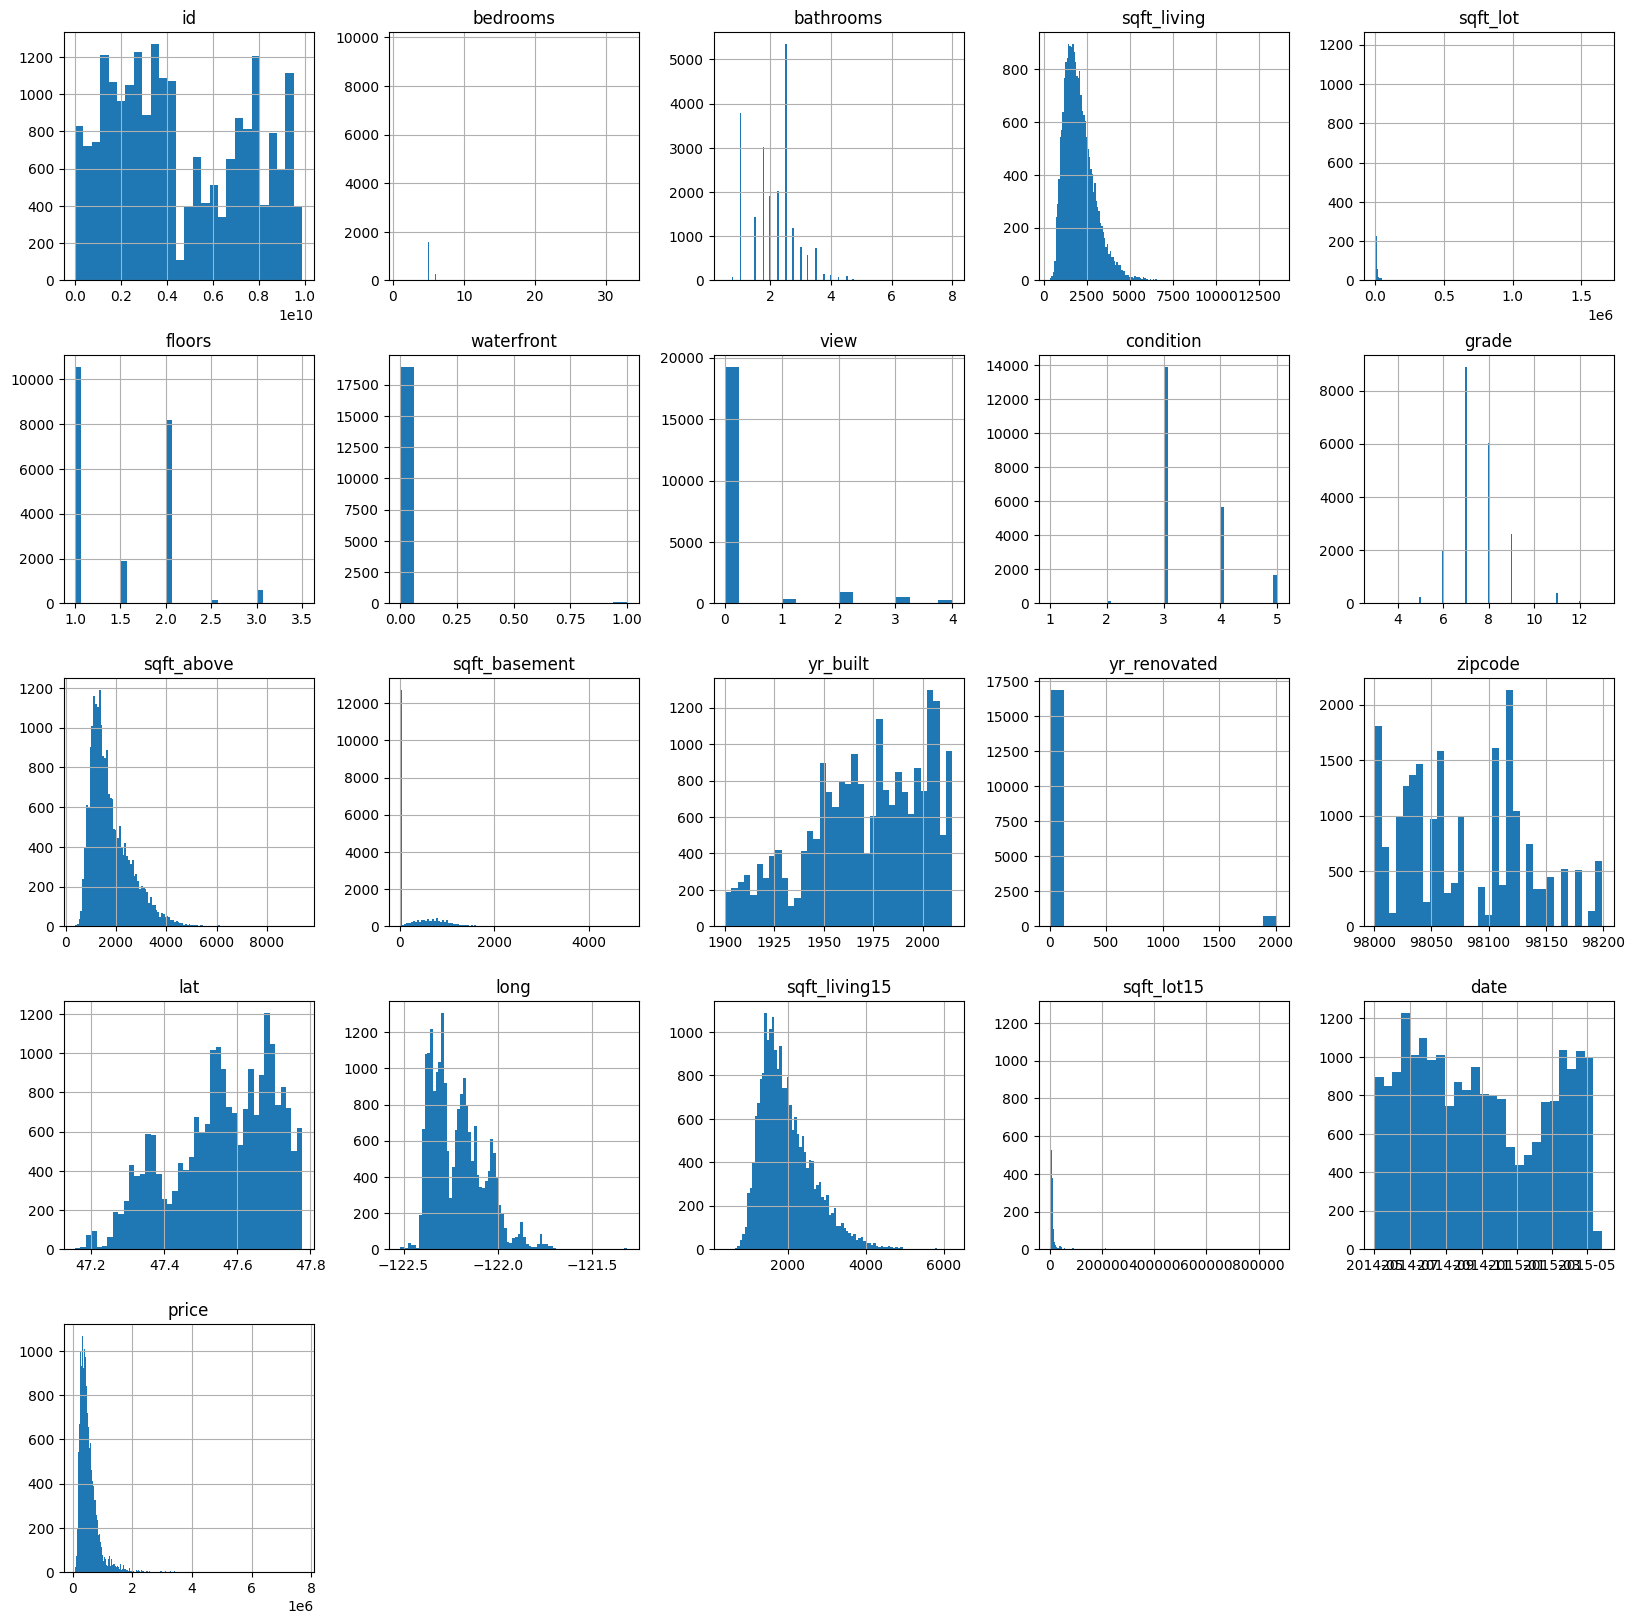

In [120]:
df_housing2.hist(bins = "auto", figsize = (20,20));

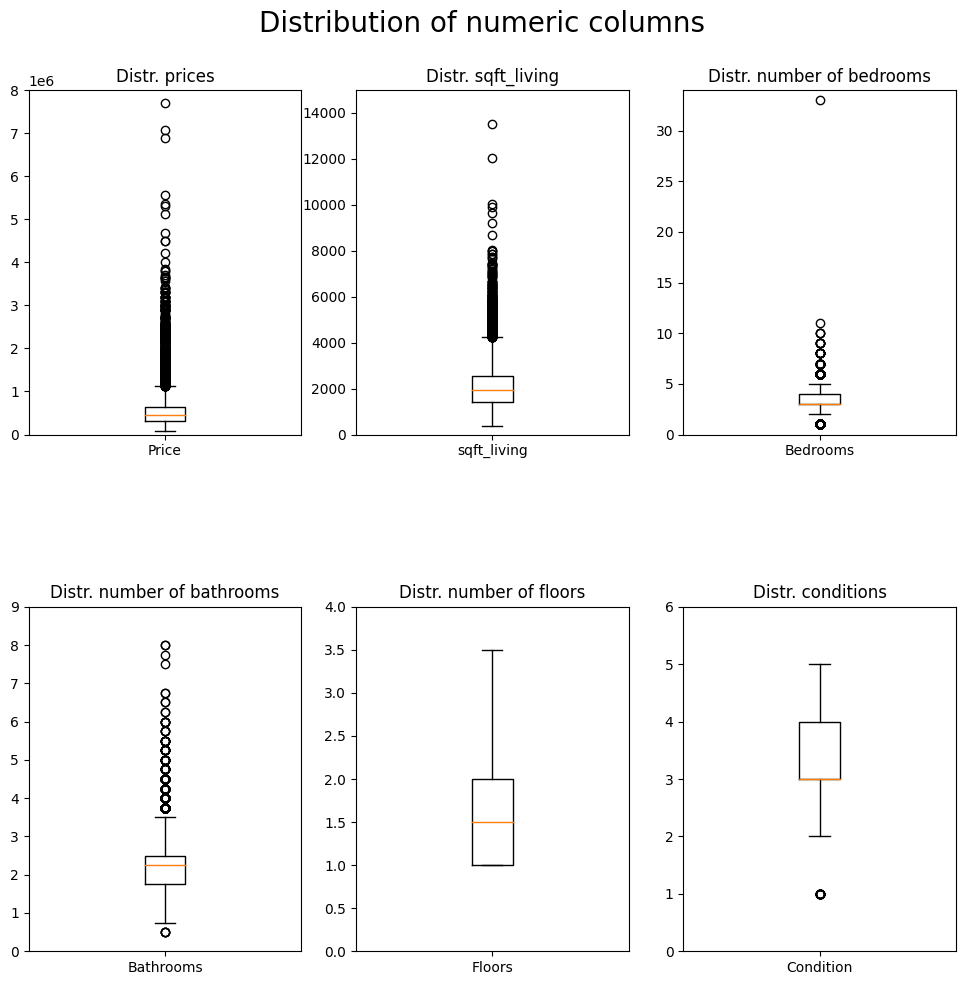

In [121]:
fig, ax = plt.subplots(2,3, figsize=(10,10)) # create subplots on 2 rows and 3 columns
plt.suptitle('Distribution of numeric columns', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots


ax[0][0].boxplot(x = df_housing2['price']) # creates boxplot for number of views
ax[0][0].set_xticklabels(labels=["Price"]) # sets the label for the ticks on the x-axis
ax[0][0].set_ylim(0,8000000) # limits the y-axis values from 0 to 2000000 
ax[0][0].set_title("Distr. prices", fontsize = 12); # sets title for subplot

ax[0][1].boxplot(x = df_housing2['sqft_living'])  
ax[0][1].set_xticklabels(labels=["sqft_living"]) 
ax[0][1].set_ylim(0,15000) 
ax[0][1].set_title("Distr. sqft_living", fontsize = 12); 

ax[0][2].boxplot(x = df_housing2['bedrooms']) 
ax[0][2].set_xticklabels(labels=["Bedrooms"]) 
ax[0][2].set_ylim(0,34) 
ax[0][2].set_title("Distr. number of bedrooms", fontsize = 12); 

ax[1][0].boxplot(x = df_housing2['bathrooms']) 
ax[1][0].set_xticklabels(labels=["Bathrooms"]) 
ax[1][0].set_ylim(0,9) 
ax[1][0].set_title("Distr. number of bathrooms", fontsize = 12); 

ax[1][1].boxplot(x = df_housing2['floors']) 
ax[1][1].set_xticklabels(labels=["Floors"]) 
ax[1][1].set_ylim(0,4) 
ax[1][1].set_title("Distr. number of floors", fontsize = 12); 

ax[1][2].boxplot(x = df_housing2['condition']) 
ax[1][2].set_xticklabels(labels=["Condition"]) 
ax[1][2].set_ylim(0,6) 
ax[1][2].set_title("Distr. conditions", fontsize = 12); 




In [122]:
df_housing2.corr()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,1.00,0.00,0.00,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01,-0.01,-0.01,0.02,-0.01,-0.01,-0.00,0.02,-0.00,-0.14,-0.02
bedrooms,0.00,1.00,0.52,0.58,0.03,0.18,-0.00,0.08,0.03,0.36,0.48,0.30,0.16,0.02,-0.16,-0.01,0.13,0.39,0.03,0.31
bathrooms,0.00,0.52,1.00,0.76,0.09,0.50,0.07,0.19,-0.13,0.67,0.69,0.28,0.51,0.05,-0.20,0.02,0.22,0.57,0.09,0.53
sqft_living,-0.01,0.58,0.76,1.00,0.17,0.35,0.11,0.28,-0.06,0.76,0.88,0.43,0.32,0.06,-0.20,0.05,0.24,0.76,0.18,0.70
sqft_lot,-0.13,0.03,0.09,0.17,1.00,-0.01,0.02,0.08,-0.01,0.11,0.18,0.02,0.05,0.00,-0.13,-0.09,0.23,0.14,0.72,0.09
floors,0.02,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.27,0.46,0.52,-0.25,0.49,0.00,-0.06,0.05,0.12,0.28,-0.01,0.25
waterfront,-0.00,-0.00,0.07,0.11,0.02,0.02,1.00,0.41,0.02,0.09,0.08,0.09,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03,0.28
view,0.01,0.08,0.19,0.28,0.08,0.03,0.41,1.00,0.04,0.25,0.17,0.28,-0.06,0.10,0.09,0.01,-0.08,0.28,0.07,0.40
condition,-0.02,0.03,-0.13,-0.06,-0.01,-0.27,0.02,0.04,1.00,-0.15,-0.16,0.17,-0.37,-0.06,0.00,-0.02,-0.11,-0.10,-0.00,0.03
grade,0.01,0.36,0.67,0.76,0.11,0.46,0.09,0.25,-0.15,1.00,0.76,0.17,0.45,0.02,-0.18,0.11,0.20,0.71,0.12,0.67


<AxesSubplot:>

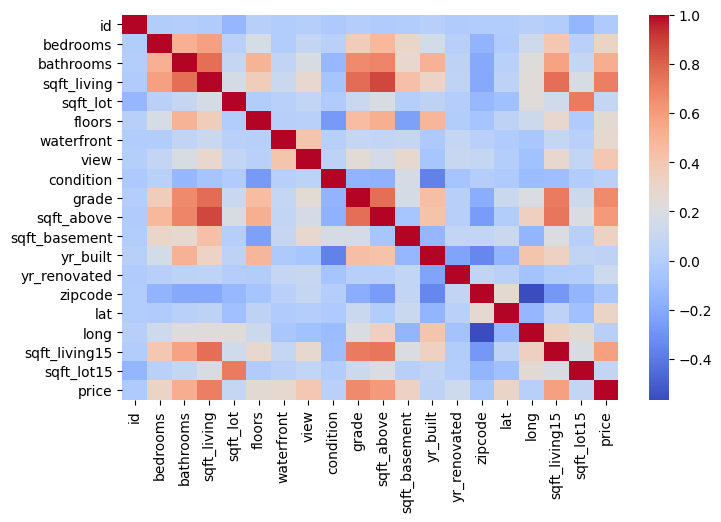

In [123]:
sns.heatmap(df_housing2.corr(), annot=False, cmap='coolwarm')

Now I want to know where 'city' and where 'rural' is. 
I define this by looking for 'King County, WA' at google maps. 
Here I found that around longitude -121.973624 is the threshold between 'city' and 'country'. So I will create 1 new variable: 'countryside', either 0 or 1 corresponding to longitude of the house. 


Then another with 'city_centre'. A quick search on google gave me 11 neighborhoods when searching for "seattle central neighborhoods". On google maps, this resulted in longitudes between -122.256696 and -122.4174656 and latitudes between 47.686815 and 47.495760. 

This worked! I now have 2 new variables declaring whether the house is in the city centre (0/1) or on the countryside (0/1). Now adding a third column "suburbs" for houses not in the city centre and not on the countryside.

<img src="city_country.png" width = 500>

Finally, create a categorical location column out of these. 

In [124]:
## Create a dummy classifier for countryside or not
df_housing2['countryside'] = np.where(df_housing2.long > -121.973624, 1, 0)
## Create a dummy classifier for city centre or not
df_housing2['city_centre'] = np.where((df_housing2.long > -122.417465) & (df_housing2.long < -122.256696) & (df_housing2.lat < 47.686815) & (df_housing2.lat > 47.495760) , 1, 0)
## Create a dummy classifier for suburbs or not
df_housing2["suburbs"] = np.where((df_housing2["city_centre"]== 0) & (df_housing2["countryside"] == 0), 1, 0)

## Create categorical column for location (=countryside/city_centre/suburbs)
df_housing2['location'] = np.select([df_housing2['suburbs'] == 1, df_housing2['countryside'] == 1, df_housing2['city_centre'] == 1], ["suburbs","countryside", "city_centre" ], default=np.nan)

df_housing2.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,date,price,countryside,city_centre,suburbs,location
0,1737320120,5.00,2.50,"2,210.00","9,655.00",1.00,0.00,0.00,3,8,...,47.77,-122.22,"2,080.00","8,633.00",2014-05-02,"470,000.00",0,0,1,suburbs
1,5561000190,3.00,2.25,"1,970.00","35,100.00",2.00,0.00,0.00,4,9,...,47.46,-121.99,"2,340.00","35,100.00",2014-05-02,"437,500.00",0,0,1,suburbs
2,8673400086,3.00,2.50,"1,270.00","1,180.00",3.00,0.00,0.00,3,8,...,47.67,-122.39,"1,320.00","1,180.00",2014-05-02,"445,700.00",0,1,0,city_centre
3,1868902745,3.00,2.00,"2,710.00","4,500.00",1.50,0.00,0.00,4,8,...,47.67,-122.30,"2,060.00","4,500.00",2014-05-02,"805,000.00",0,1,0,city_centre
4,1771000430,3.00,1.00,"1,160.00","9,180.00",1.00,0.00,0.00,3,7,...,47.74,-122.07,"1,160.00","10,282.00",2014-05-02,"315,000.00",0,0,1,suburbs


Now compare those three categories of housing areas. 

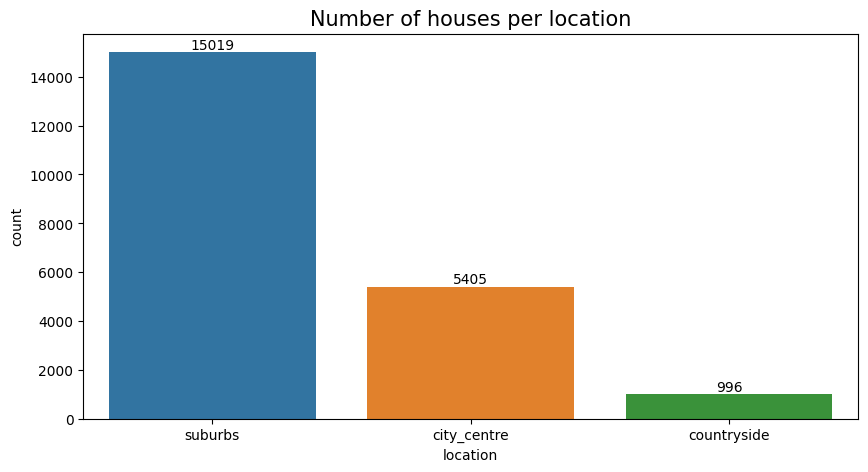

In [125]:
#color_pal = sns.color_palette("colorblind", 6).as_hex()
#colors = ','.join(color_pal)
plt.figure(figsize=(10,5))
ax = sns.countplot(x='location', data=df_housing2)
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_title('Number of houses per location', fontsize=15);

In [126]:
df_housing2.groupby('location', as_index=False)['price'].describe()

location  0    city_centre
          1    countryside
          2        suburbs
count     0       5,405.00
          1         996.00
          2      15,019.00
mean      0     604,228.98
          1     505,547.83
          2     521,824.92
std       0     374,926.91
          1     240,051.72
          2     369,311.64
min       0      89,950.00
          1      80,000.00
          2      78,000.00
25%       0     385,000.00
          1     350,000.00
          2     305,000.00
50%       0     525,000.00
          1     457,000.00
          2     428,000.00
75%       0     705,000.00
          1     590,000.00
          2     620,000.00
max       0   7,700,000.00
          1   2,000,000.00
          2   7,060,000.00
dtype: object

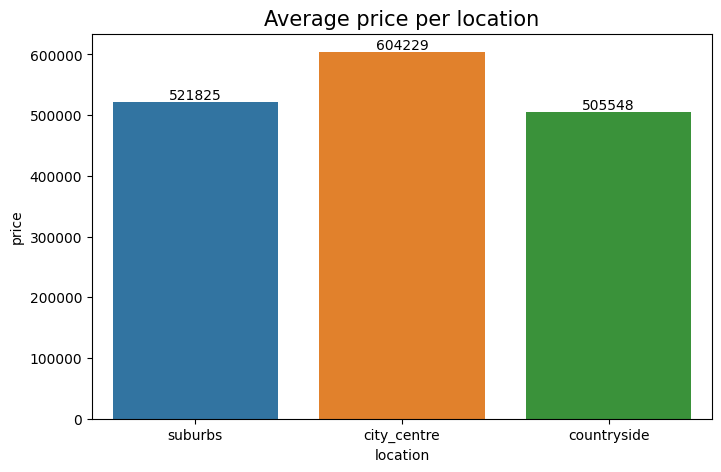

In [127]:
## plot mean price per location
df_housing2.groupby('location', as_index=False)['price'].mean()
# plot
p = sns.barplot('location', 'price', data=df_housing2, ci=False)
p.bar_label(p.containers[0], fontsize=10)
p.set_title('Average price per location', fontsize=15);

Now look for outliers per location. 

<AxesSubplot:xlabel='location', ylabel='price'>

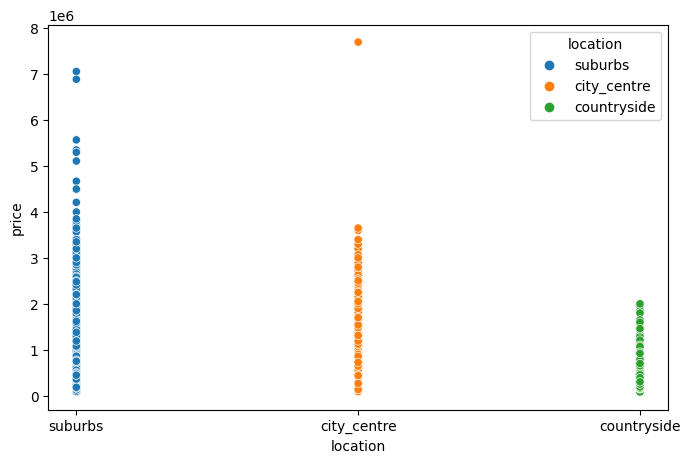

In [128]:
sns.scatterplot(data=df_housing2,x='location',y='price', hue='location')

There are outliers for the suburbs and the city centre. It looks like every price > 6mio should be dropped. 
Especially the city centre one alters the impression of the average housing price in the city centre. 

<AxesSubplot:xlabel='location', ylabel='price'>

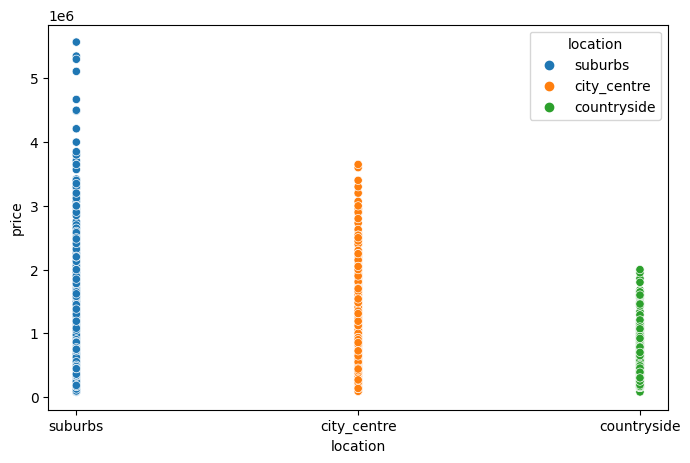

In [129]:
df_housing3 = df_housing2[df_housing2.price < 6000000]
sns.scatterplot(data=df_housing3,x='location',y='price', hue='location')

In [130]:
df_housing3.groupby('location', as_index=False)['price'].describe()

location  0    city_centre
          1    countryside
          2        suburbs
count     0       5,404.00
          1         996.00
          2      15,017.00
mean      0     602,915.93
          1     505,547.83
          2     520,965.47
std       0     362,319.74
          1     240,051.72
          2     361,747.16
min       0      89,950.00
          1      80,000.00
          2      78,000.00
25%       0     385,000.00
          1     350,000.00
          2     305,000.00
50%       0     525,000.00
          1     457,000.00
          2     428,000.00
75%       0     705,000.00
          1     590,000.00
          2     620,000.00
max       0   3,650,000.00
          1   2,000,000.00
          2   5,570,000.00
dtype: object

Let's see how the average price for a house in each location has changed now. 

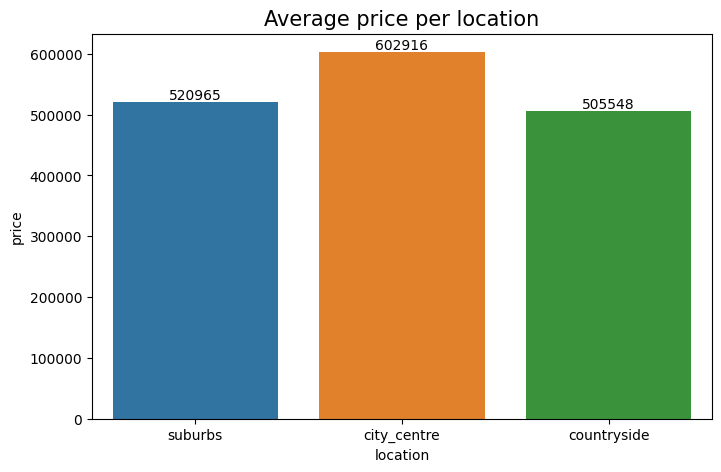

In [131]:
## plot mean price per location
df_housing3.groupby('location', as_index=False)['price'].mean()
# plot
p = sns.barplot('location', 'price', data=df_housing3, ci=False)
p.bar_label(p.containers[0], fontsize=10)
p.set_title('Average price per location', fontsize=15);

Now, I will create subsets regarding our most important conditions for the client: 

- 1 set with only countryside houses
- 1 set with only city centre houses
- 1 set with the onther houses (suburbs) --> not important for client but nice insight to data

In [132]:
## subset the dataset
df_countryside = df_housing2[df_housing2["countryside"]==1]
df_countryside.describe()

df_citycentre = df_housing2[df_housing2["city_centre"]==1]
df_citycentre.describe()

df_suburbs = df_housing2[df_housing2["suburbs"]==1]
df_suburbs.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,countryside,city_centre,suburbs
count,"15,019.00","15,019.00","15,019.00","15,019.00","15,019.00","15,019.00","13,358.00","14,978.00","15,019.00","15,019.00",...,"12,354.00","15,019.00","15,019.00","15,019.00","15,019.00","15,019.00","15,019.00","15,019.00","15,019.00","15,019.00"
mean,"4,537,610,940.25",3.45,2.16,"2,158.80","16,020.84",1.47,0.01,0.21,3.42,7.74,...,64.43,"98,063.61",47.55,-122.19,"2,079.24","13,554.60","521,824.92",0.00,0.00,1.00
std,"2,822,558,850.57",0.88,0.74,924.32,"37,403.05",0.52,0.10,0.74,0.63,1.19,...,352.69,52.81,0.16,0.11,699.02,"23,691.21","369,311.64",0.00,0.00,0.00
min,"1,000,102.00",1.00,0.50,380.00,683.00,1.00,0.00,0.00,1.00,3.00,...,0.00,"98,001.00",47.18,-122.52,399.00,659.00,"78,000.00",0.00,0.00,1.00
25%,"2,131,701,157.50",3.00,1.75,"1,500.00","6,656.00",1.00,0.00,0.00,3.00,7.00,...,0.00,"98,028.00",47.40,-122.29,"1,560.00","6,800.00","305,000.00",0.00,0.00,1.00
50%,"3,904,960,150.00",3.00,2.25,"2,000.00","8,530.00",1.00,0.00,0.00,3.00,8.00,...,0.00,"98,052.00",47.56,-122.19,"1,950.00","8,400.00","428,000.00",0.00,0.00,1.00
75%,"7,214,800,215.00",4.00,2.50,"2,630.00","12,000.00",2.00,0.00,0.00,4.00,8.00,...,0.00,"98,092.00",47.70,-122.11,"2,480.00","10,988.50","620,000.00",0.00,0.00,1.00
max,"9,900,000,190.00",33.00,8.00,"13,540.00","1,651,359.00",3.00,1.00,4.00,5.00,13.00,...,"2,015.00","98,198.00",47.78,-121.97,"6,210.00","560,617.00","7,060,000.00",0.00,0.00,1.00


With a rule of thumb using the interquartile range, a reasonable max. price for each location can be found. 

In [133]:
## reasonable max price for countryside
pri_countryside = df_countryside['price']
outliers_countryside = (pri_countryside.quantile(0.75) - pri_countryside.quantile(0.25))*1.5
threshold_countryside = pri_countryside.quantile(0.75) + outliers_countryside
#950000

## reasonable max price for city centre
pri_citycentre = df_citycentre['price']
outliers_citycentre = (pri_citycentre.quantile(0.75) - pri_citycentre.quantile(0.25))*1.5
threshold_citycentre = pri_citycentre.quantile(0.75) + outliers_citycentre
#1185000

## reasonable max price for suburbs
pri_suburbs = df_suburbs['price']
outliers_suburbs = (pri_suburbs.quantile(0.75) - pri_suburbs.quantile(0.25))*1.5
threshold_suburbs = pri_suburbs.quantile(0.75) + outliers_suburbs
#1092500

print(threshold_countryside, threshold_citycentre, threshold_suburbs)

950000.0 1185000.0 1092500.0


Now have a look at the size of the places. 

<AxesSubplot:xlabel='location', ylabel='sqft_living'>

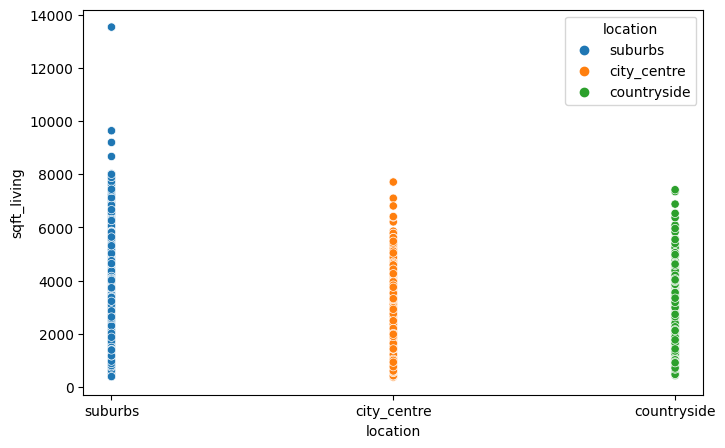

In [134]:
sns.scatterplot(data=df_housing3,x='location',y='sqft_living', hue='location')

Looks like there is an outlier in the suburbs. 

In [135]:
## drop the sqft_living outlier
df_housing3 = df_housing3[df_housing3.sqft_living < 10000]

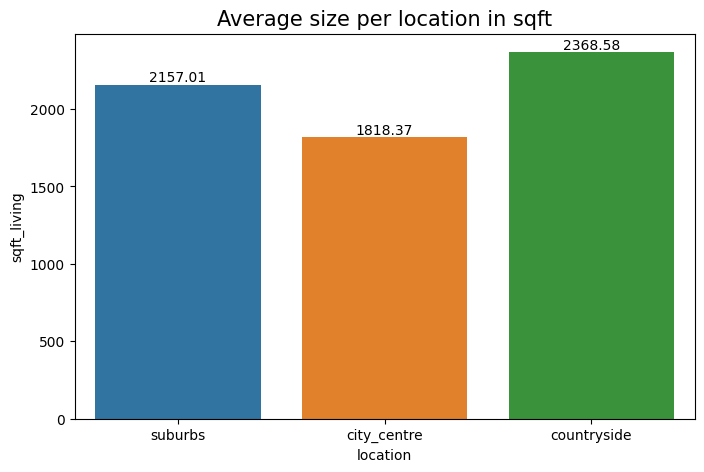

In [136]:
## plot mean size per location
df_housing3.groupby('location', as_index=False)['sqft_living'].mean()
# plot
p = sns.barplot('location', 'sqft_living', data=df_housing3, ci=False)
p.bar_label(p.containers[0], fontsize=10)
p.set_title('Average size per location in sqft', fontsize=15);

In [137]:
df_housing3.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,countryside,city_centre,suburbs
count,"21,416.00","21,416.00","21,416.00","21,416.00","21,416.00","21,416.00","19,056.00","21,353.00","21,416.00","21,416.00",...,"17,605.00","21,416.00","21,416.00","21,416.00","21,416.00","21,416.00","21,416.00","21,416.00","21,416.00","21,416.00"
mean,"4,580,534,489.52",3.37,2.12,"2,081.40","15,112.00",1.50,0.01,0.23,3.41,7.66,...,83.67,"98,077.88",47.56,-122.21,"1,987.95","12,764.34","540,845.25",0.05,0.25,0.70
std,"2,876,504,124.09",0.92,0.77,909.83,"41,486.00",0.54,0.09,0.77,0.65,1.17,...,400.04,53.48,0.14,0.14,684.84,"27,311.35","358,779.62",0.21,0.43,0.46
min,"1,000,102.00",1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,...,0.00,"98,001.00",47.16,-122.52,399.00,651.00,"78,000.00",0.00,0.00,0.00
25%,"2,123,537,386.75",3.00,1.75,"1,430.00","5,040.00",1.00,0.00,0.00,3.00,7.00,...,0.00,"98,033.00",47.47,-122.33,"1,490.00","5,100.00","324,950.00",0.00,0.00,0.00
50%,"3,904,921,110.00",3.00,2.25,"1,920.00","7,612.00",1.50,0.00,0.00,3.00,7.00,...,0.00,"98,065.00",47.57,-122.23,"1,840.00","7,620.00","450,250.00",0.00,0.00,1.00
75%,"7,308,675,062.50",4.00,2.50,"2,550.00","10,685.50",2.00,0.00,0.00,4.00,8.00,...,0.00,"98,117.00",47.68,-122.12,"2,370.00","10,083.25","645,000.00",0.00,1.00,1.00
max,"9,900,000,190.00",33.00,7.50,"9,640.00","1,651,359.00",3.50,1.00,4.00,5.00,13.00,...,"2,015.00","98,199.00",47.78,-121.31,"6,210.00","871,200.00","5,570,000.00",1.00,1.00,1.00


Now have a look at the timing of buying a house. Does the price change with the date?

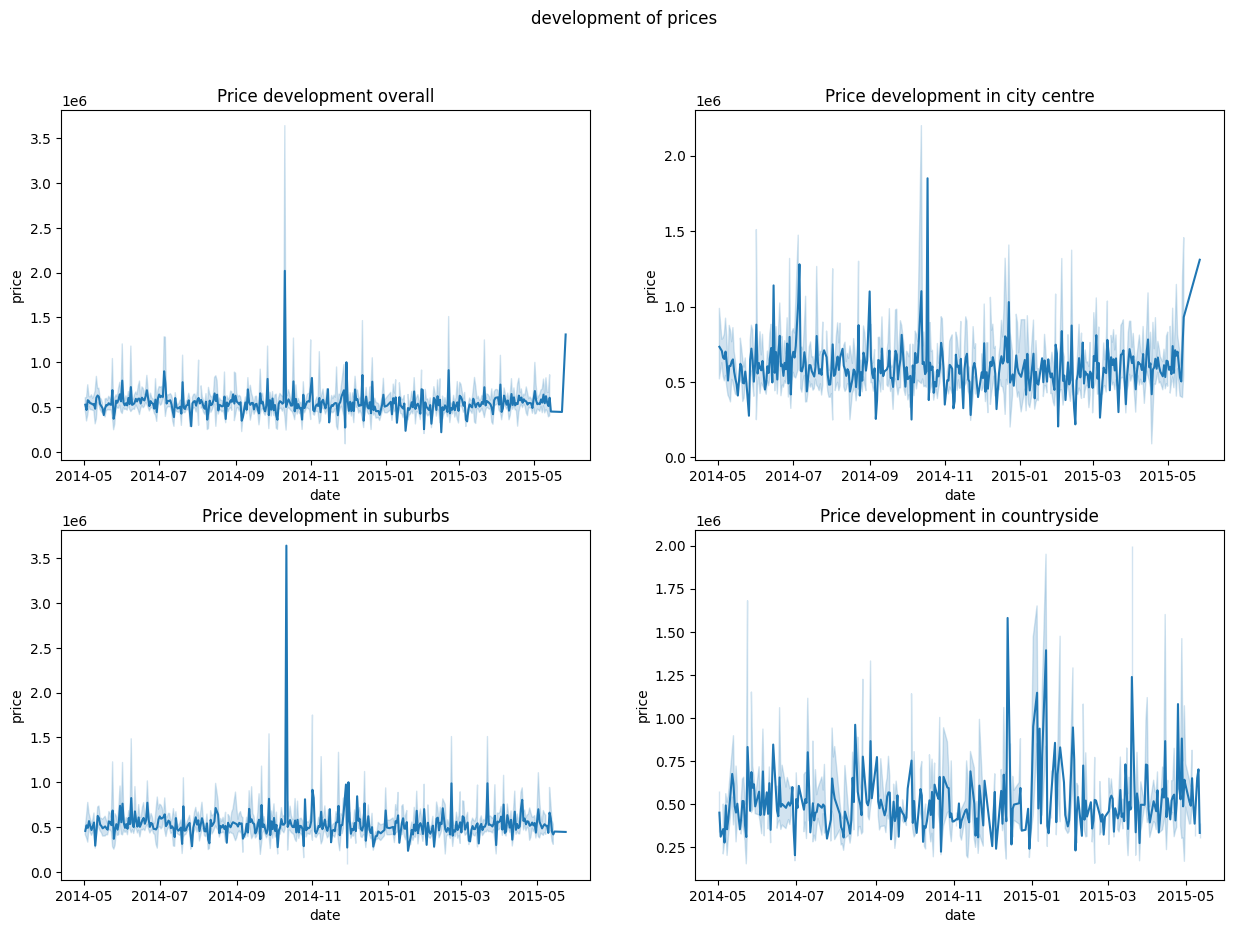

In [138]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
 
fig.suptitle('development of prices')
 
all = sns.lineplot(ax=axes[0, 0], data=df_housing3, x='date',y='price')
all.title.set_text('Price development overall')

cicen = sns.lineplot(ax=axes[0, 1], data=df_citycentre, x='date',y='price')
cicen.title.set_text('Price development in city centre')

subur = sns.lineplot(ax=axes[1, 0], data=df_suburbs, x='date',y='price')
subur.title.set_text('Price development in suburbs')

counsi = sns.lineplot(ax=axes[1, 1], data=df_countryside, x='date',y='price')
counsi.title.set_text('Price development in countryside')

Doesn't tell uns much this way. Let's make new variables containing the year and the month. 

In [139]:
# extract year, month, dayofweek and hour information out of column publish_time and build new column for each
df_housing3["year_sold"]=df_housing3["date"].dt.year
df_housing3["month_sold"]=df_housing3["date"].dt.month
df_housing3["weekday_sold"]=df_housing3["date"].dt.dayofweek

df_housing3.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,date,price,countryside,city_centre,suburbs,location,year_sold,month_sold,weekday_sold
0,1737320120,5.00,2.50,"2,210.00","9,655.00",1.00,0.00,0.00,3,8,...,"8,633.00",2014-05-02,"470,000.00",0,0,1,suburbs,2014,5,4
1,5561000190,3.00,2.25,"1,970.00","35,100.00",2.00,0.00,0.00,4,9,...,"35,100.00",2014-05-02,"437,500.00",0,0,1,suburbs,2014,5,4
2,8673400086,3.00,2.50,"1,270.00","1,180.00",3.00,0.00,0.00,3,8,...,"1,180.00",2014-05-02,"445,700.00",0,1,0,city_centre,2014,5,4
3,1868902745,3.00,2.00,"2,710.00","4,500.00",1.50,0.00,0.00,4,8,...,"4,500.00",2014-05-02,"805,000.00",0,1,0,city_centre,2014,5,4
4,1771000430,3.00,1.00,"1,160.00","9,180.00",1.00,0.00,0.00,3,7,...,"10,282.00",2014-05-02,"315,000.00",0,0,1,suburbs,2014,5,4


Adjust the subsets:

In [140]:
## subset the dataset
df_countryside = df_housing3[df_housing2["countryside"]==1]
df_countryside.describe()

df_citycentre = df_housing3[df_housing2["city_centre"]==1]
df_citycentre.describe()

df_suburbs = df_housing3[df_housing2["suburbs"]==1]
df_suburbs.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,long,sqft_living15,sqft_lot15,price,countryside,city_centre,suburbs,year_sold,month_sold,weekday_sold
count,"15,016.00","15,016.00","15,016.00","15,016.00","15,016.00","15,016.00","13,355.00","14,975.00","15,016.00","15,016.00",...,"15,016.00","15,016.00","15,016.00","15,016.00","15,016.00","15,016.00","15,016.00","15,016.00","15,016.00","15,016.00"
mean,"4,537,169,422.07",3.45,2.16,"2,157.01","15,998.97",1.47,0.01,0.21,3.42,7.74,...,-122.19,"2,078.77","13,538.26","520,848.33",0.00,0.00,1.00,"2,014.33",6.56,2.01
std,"2,822,126,065.49",0.88,0.74,915.31,"37,330.32",0.52,0.10,0.74,0.63,1.19,...,0.11,698.27,"23,633.47","361,474.26",0.00,0.00,0.00,0.47,3.13,1.46
min,"1,000,102.00",1.00,0.50,380.00,683.00,1.00,0.00,0.00,1.00,3.00,...,-122.52,399.00,659.00,"78,000.00",0.00,0.00,1.00,"2,014.00",1.00,0.00
25%,"2,131,701,198.75",3.00,1.75,"1,500.00","6,655.00",1.00,0.00,0.00,3.00,7.00,...,-122.29,"1,560.00","6,800.00","305,000.00",0.00,0.00,1.00,"2,014.00",4.00,1.00
50%,"3,904,955,170.00",3.00,2.25,"2,000.00","8,529.00",1.00,0.00,0.00,3.00,8.00,...,-122.19,"1,950.00","8,400.00","427,900.00",0.00,0.00,1.00,"2,014.00",6.00,2.00
75%,"7,214,792,630.00",4.00,2.50,"2,630.00","12,000.00",2.00,0.00,0.00,4.00,8.00,...,-122.11,"2,480.00","10,987.25","620,000.00",0.00,0.00,1.00,"2,015.00",9.00,3.00
max,"9,900,000,190.00",33.00,6.75,"9,640.00","1,651,359.00",3.00,1.00,4.00,5.00,13.00,...,-121.97,"6,210.00","560,617.00","5,570,000.00",0.00,0.00,1.00,"2,015.00",12.00,6.00


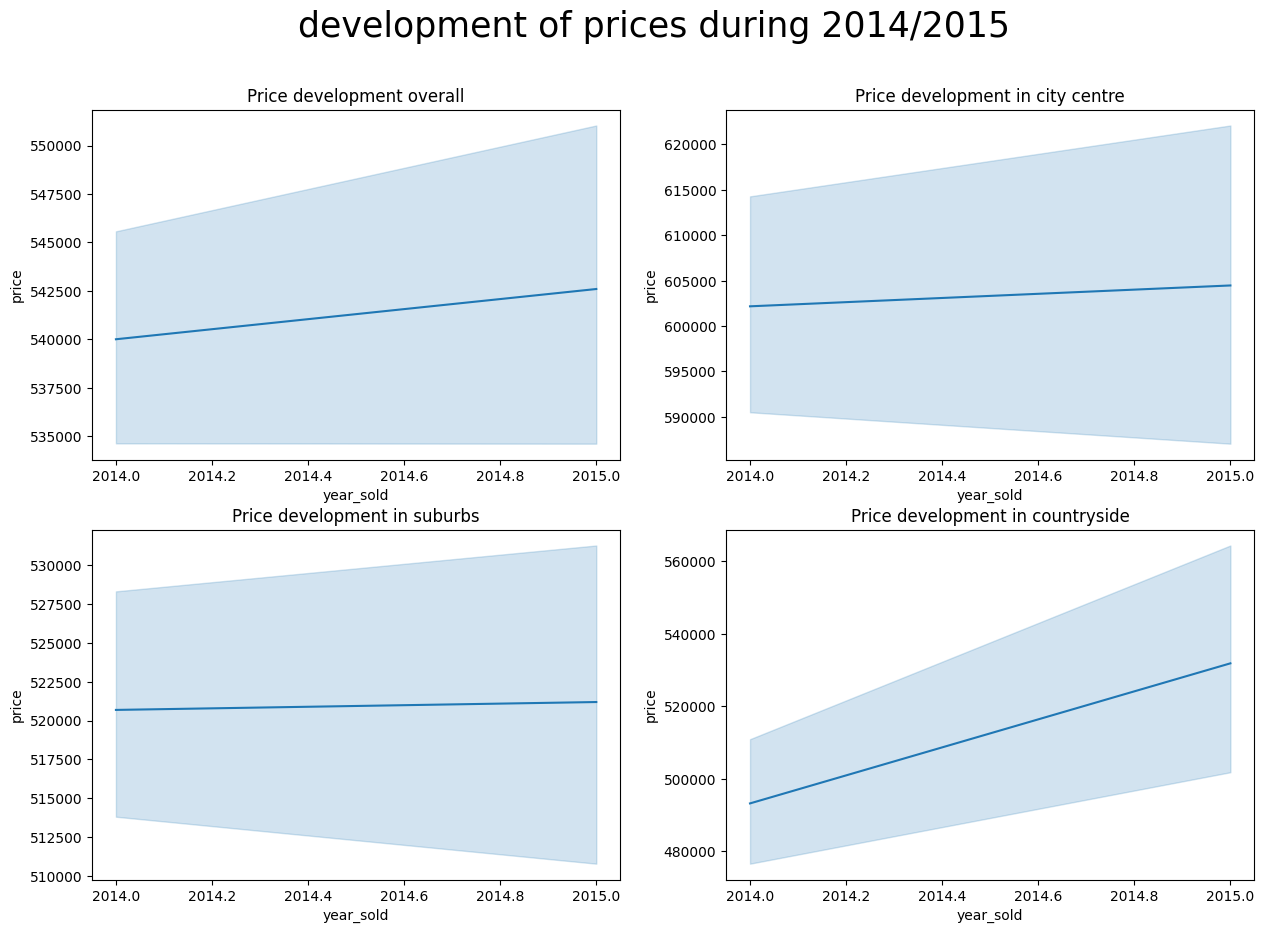

In [141]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
 
fig.suptitle('development of prices during 2014/2015', fontsize=25)
 
all = sns.lineplot(ax=axes[0, 0], data=df_housing3, x='year_sold',y='price')
all.title.set_text('Price development overall')

cicen = sns.lineplot(ax=axes[0, 1], data=df_citycentre, x='year_sold',y='price')
cicen.title.set_text('Price development in city centre')

subur = sns.lineplot(ax=axes[1, 0], data=df_suburbs, x='year_sold',y='price')
subur.title.set_text('Price development in suburbs')

counsi = sns.lineplot(ax=axes[1, 1], data=df_countryside, x='year_sold',y='price')
counsi.title.set_text('Price development in countryside')

Over the time of 2 years, prices in the city centre and the suburbs remained relatively stable, while on the countryside there is a trend to higher prices. 

Let's see if making a good deal buying a house is a question of season!

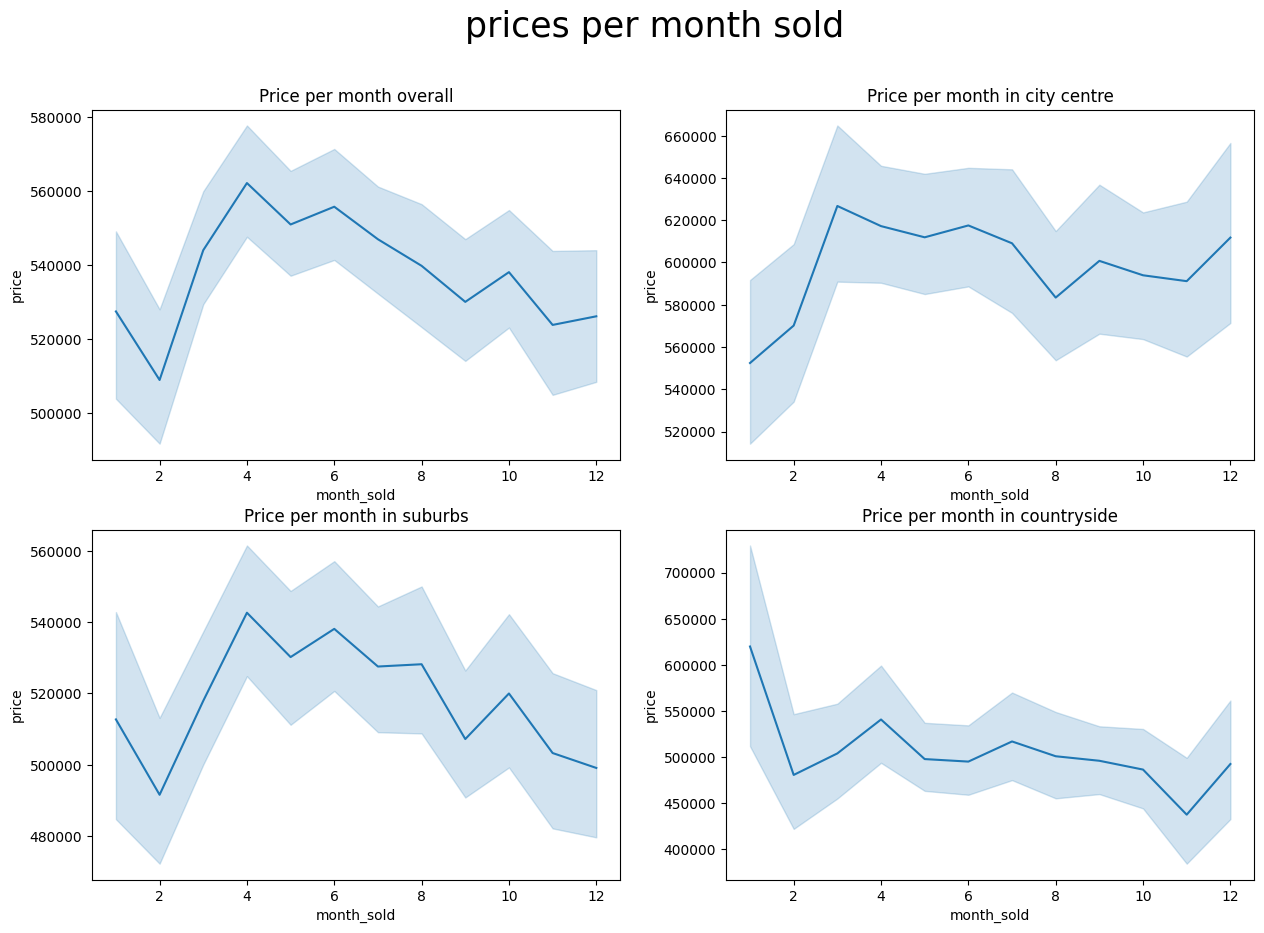

In [142]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
 
fig.suptitle('prices per month sold', fontsize = 25)
 
all = sns.lineplot(ax=axes[0, 0], data=df_housing3, x='month_sold',y='price')
all.title.set_text('Price per month overall')

cicen = sns.lineplot(ax=axes[0, 1], data=df_citycentre, x='month_sold',y='price')
cicen.title.set_text('Price per month in city centre')

subur = sns.lineplot(ax=axes[1, 0], data=df_suburbs, x='month_sold',y='price')
subur.title.set_text('Price per month in suburbs')

counsi = sns.lineplot(ax=axes[1, 1], data=df_countryside, x='month_sold',y='price')
counsi.title.set_text('Price per month in countryside')

So, overall, February and November seem to be the cheapest months to buy. In the city centre, January is the cheapest month. February has the cheapest houses in the suburbs to offer, December too is relatively cheap. For the countryside, November and February are the cheapest. However, we only have data from 2014 and 2015, so these insights should be processed with caution. 

Let's have a look at the weekdays. 

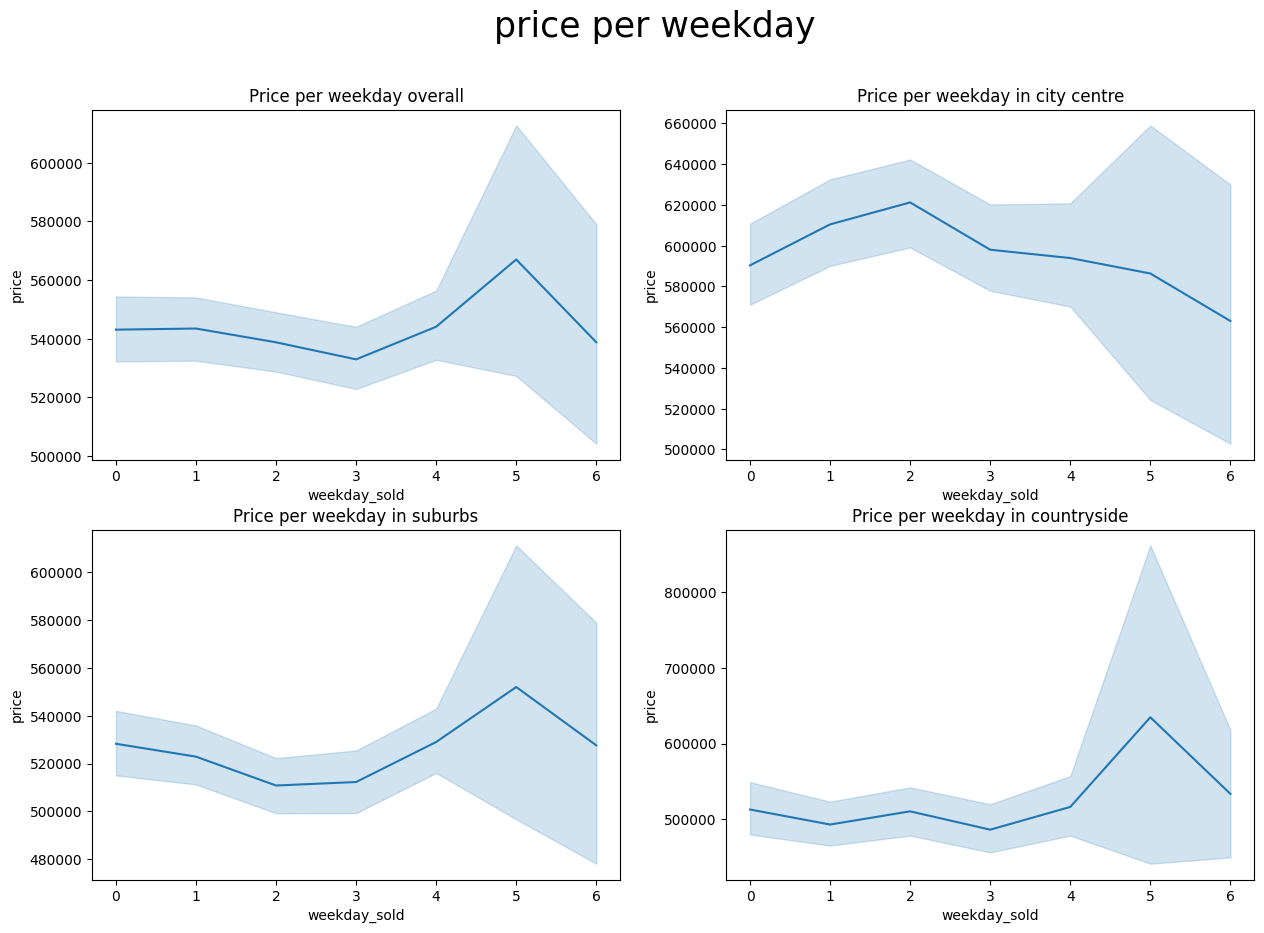

In [143]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
 
fig.suptitle('price per weekday', fontsize = 25)
 
all = sns.lineplot(ax=axes[0, 0], data=df_housing3, x='weekday_sold',y='price')
all.title.set_text('Price per weekday overall')

cicen = sns.lineplot(ax=axes[0, 1], data=df_citycentre, x='weekday_sold',y='price')
cicen.title.set_text('Price per weekday in city centre')

subur = sns.lineplot(ax=axes[1, 0], data=df_suburbs, x='weekday_sold',y='price')
subur.title.set_text('Price per weekday in suburbs')

counsi = sns.lineplot(ax=axes[1, 1], data=df_countryside, x='weekday_sold',y='price')
counsi.title.set_text('Price per weekday in countryside')

Both in the suburbs and the countryside buying a house during the weekend is the most expensive with Saturday being the most expensive day. In the city centre, buying during the weekend is cheaper and Wednesday is the most expensive day of the week. 

Now let's also see how the year a house was built is related to the price. 

First, extract the year from the building date in a new column. 

In [144]:
## subset the dataset 
df_countryside = df_housing3[df_housing2["countryside"]==1]
df_countryside.describe()

df_citycentre = df_housing3[df_housing2["city_centre"]==1]
df_citycentre.describe()

df_suburbs = df_housing3[df_housing2["suburbs"]==1]
df_suburbs.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,long,sqft_living15,sqft_lot15,price,countryside,city_centre,suburbs,year_sold,month_sold,weekday_sold
count,"15,016.00","15,016.00","15,016.00","15,016.00","15,016.00","15,016.00","13,355.00","14,975.00","15,016.00","15,016.00",...,"15,016.00","15,016.00","15,016.00","15,016.00","15,016.00","15,016.00","15,016.00","15,016.00","15,016.00","15,016.00"
mean,"4,537,169,422.07",3.45,2.16,"2,157.01","15,998.97",1.47,0.01,0.21,3.42,7.74,...,-122.19,"2,078.77","13,538.26","520,848.33",0.00,0.00,1.00,"2,014.33",6.56,2.01
std,"2,822,126,065.49",0.88,0.74,915.31,"37,330.32",0.52,0.10,0.74,0.63,1.19,...,0.11,698.27,"23,633.47","361,474.26",0.00,0.00,0.00,0.47,3.13,1.46
min,"1,000,102.00",1.00,0.50,380.00,683.00,1.00,0.00,0.00,1.00,3.00,...,-122.52,399.00,659.00,"78,000.00",0.00,0.00,1.00,"2,014.00",1.00,0.00
25%,"2,131,701,198.75",3.00,1.75,"1,500.00","6,655.00",1.00,0.00,0.00,3.00,7.00,...,-122.29,"1,560.00","6,800.00","305,000.00",0.00,0.00,1.00,"2,014.00",4.00,1.00
50%,"3,904,955,170.00",3.00,2.25,"2,000.00","8,529.00",1.00,0.00,0.00,3.00,8.00,...,-122.19,"1,950.00","8,400.00","427,900.00",0.00,0.00,1.00,"2,014.00",6.00,2.00
75%,"7,214,792,630.00",4.00,2.50,"2,630.00","12,000.00",2.00,0.00,0.00,4.00,8.00,...,-122.11,"2,480.00","10,987.25","620,000.00",0.00,0.00,1.00,"2,015.00",9.00,3.00
max,"9,900,000,190.00",33.00,6.75,"9,640.00","1,651,359.00",3.00,1.00,4.00,5.00,13.00,...,-121.97,"6,210.00","560,617.00","5,570,000.00",0.00,0.00,1.00,"2,015.00",12.00,6.00


Let's have a look at the correlation matrices overall and all 3 locations compared.

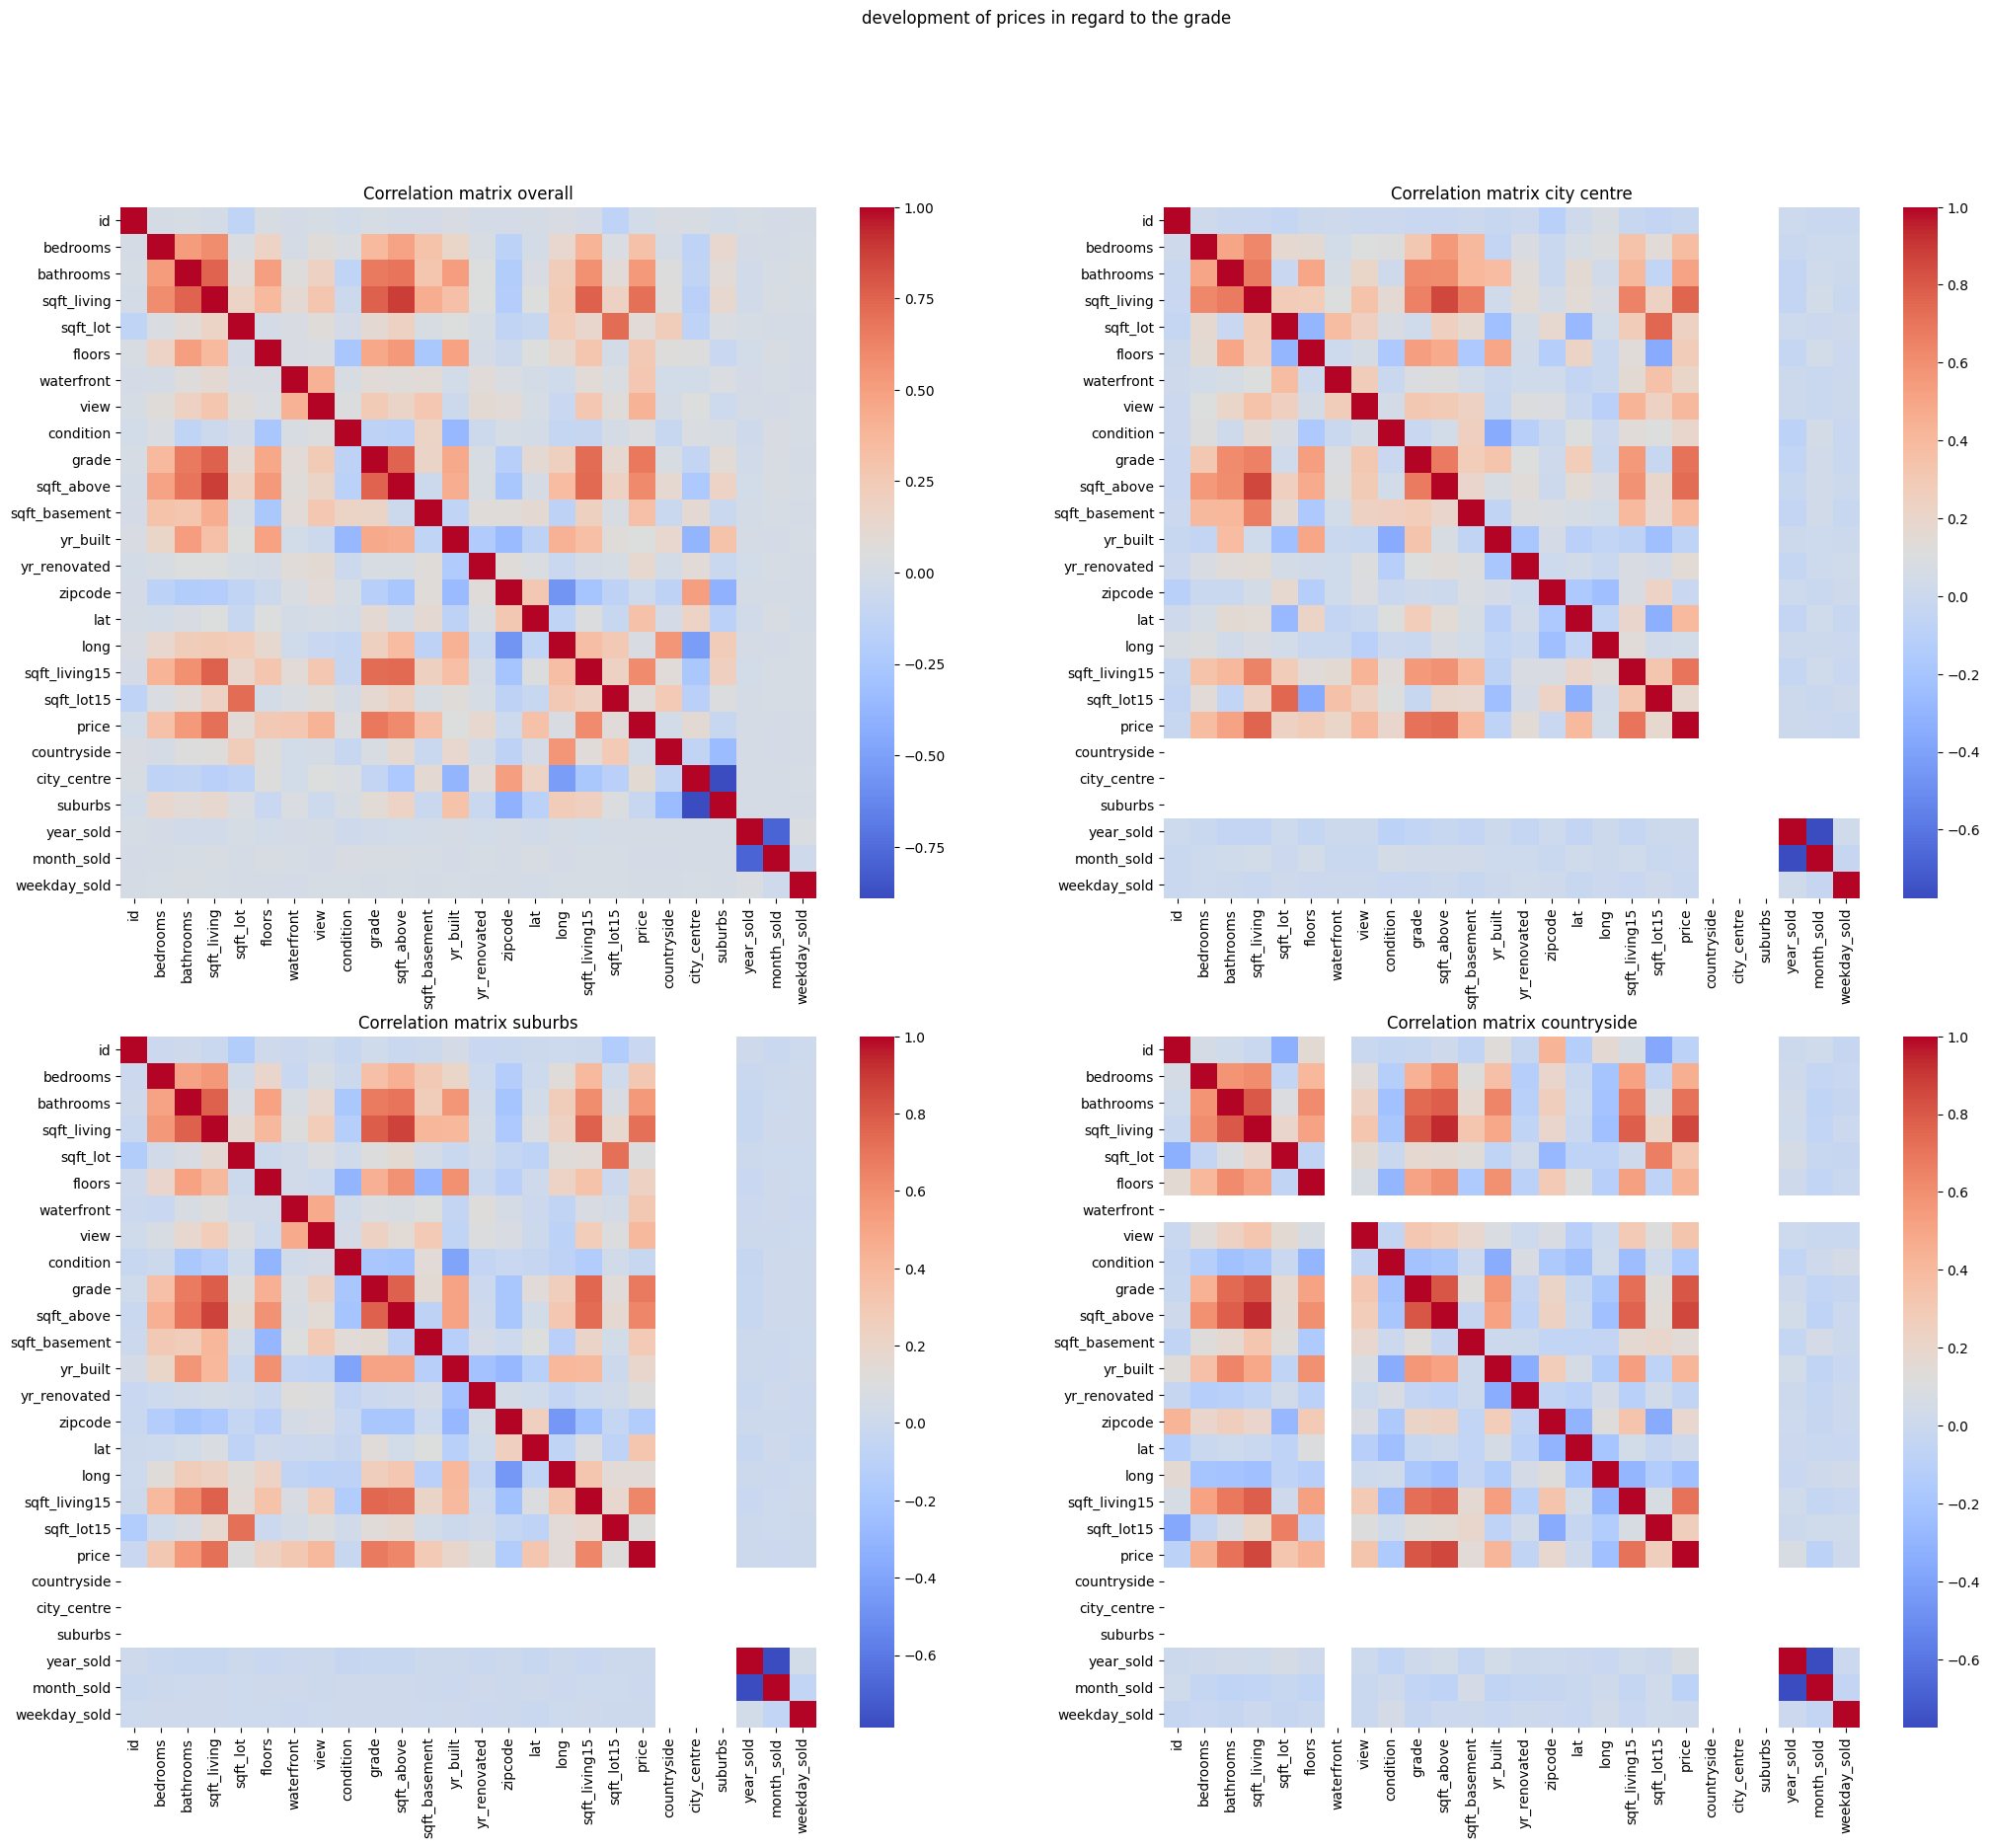

In [145]:
fig, axes = plt.subplots(2, 2, figsize=(25, 20))
 
fig.suptitle('development of prices in regard to the grade')

all = sns.heatmap(df_housing3.corr(), annot=False, cmap='coolwarm', ax=axes[0, 0])
all.title.set_text('Correlation matrix overall')

cicen = sns.heatmap(df_citycentre.corr(), annot=False, cmap='coolwarm', ax=axes[0, 1])
cicen.title.set_text('Correlation matrix city centre')

subur = sns.heatmap(df_suburbs.corr(), annot=False, cmap='coolwarm', ax=axes[1, 0])
subur.title.set_text('Correlation matrix suburbs')

counsi = sns.heatmap(df_countryside.corr(), annot=False, cmap='coolwarm', ax=axes[1, 1])
counsi.title.set_text('Correlation matrix countryside')

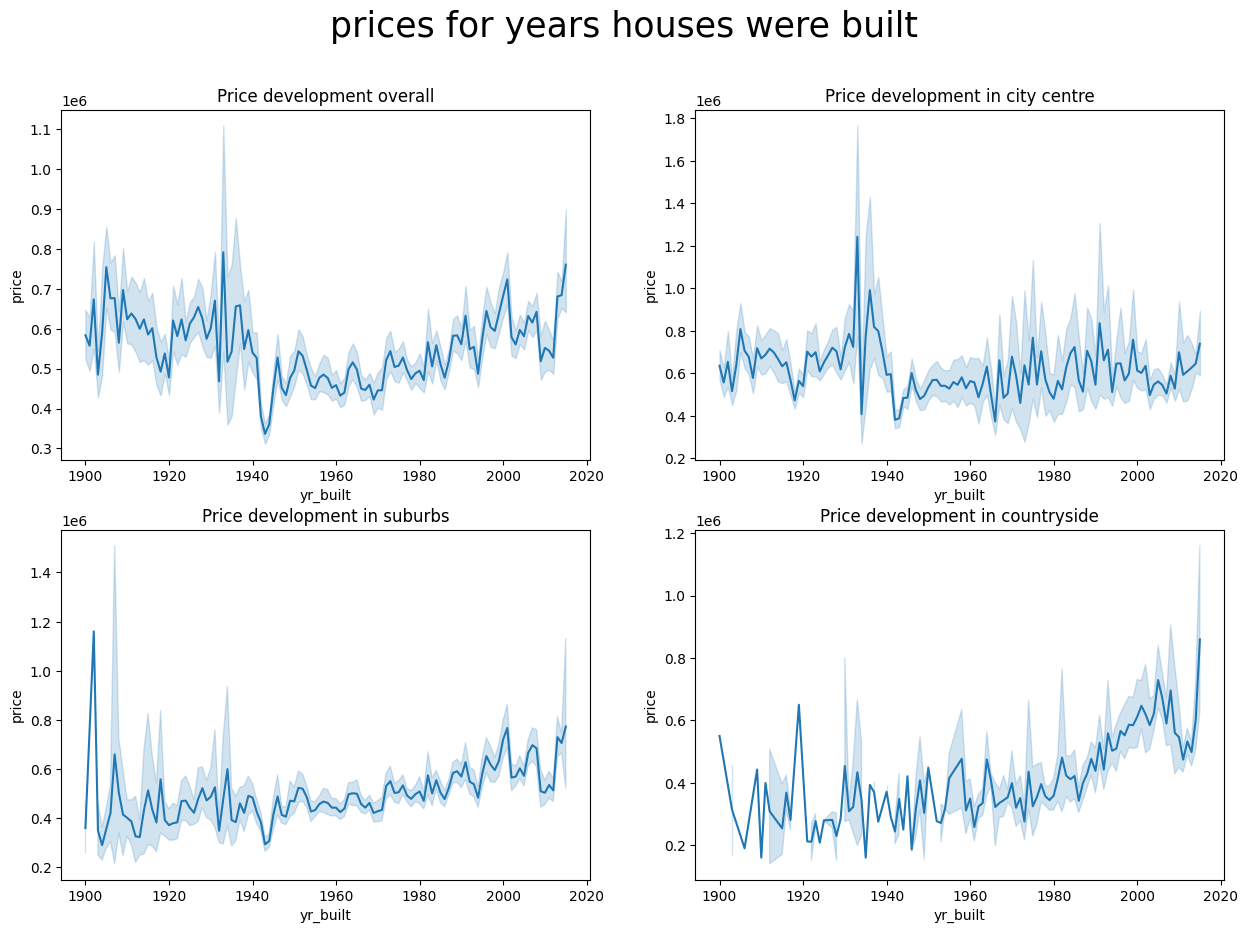

In [146]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
 
fig.suptitle('prices for years houses were built', fontsize = 25)
 
all = sns.lineplot(ax=axes[0, 0], data=df_housing3, x='yr_built',y='price')
all.title.set_text('Price development overall')

cicen = sns.lineplot(ax=axes[0, 1], data=df_citycentre, x='yr_built',y='price')
cicen.title.set_text('Price development in city centre')

subur = sns.lineplot(ax=axes[1, 0], data=df_suburbs, x='yr_built',y='price')
subur.title.set_text('Price development in suburbs')

counsi = sns.lineplot(ax=axes[1, 1], data=df_countryside, x='yr_built',y='price')
counsi.title.set_text('Price development in countryside')

Let's check the condition and how it is related to the price.

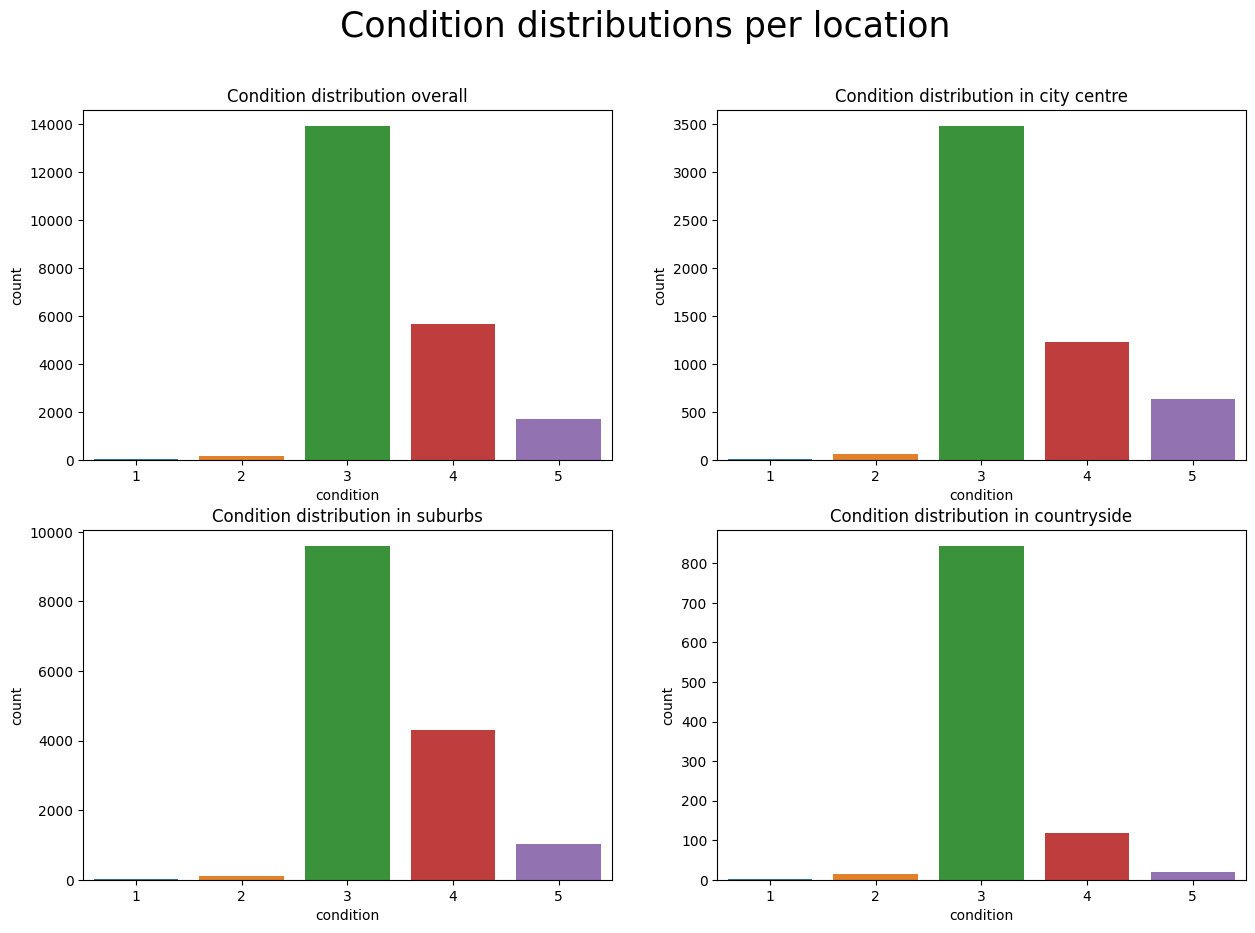

In [147]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
 
fig.suptitle('Condition distributions per location', fontsize = 25)
 
all = sns.countplot(ax=axes[0, 0], x='condition', data=df_housing3)
all.title.set_text('Condition distribution overall')

cicen = sns.countplot(ax=axes[0, 1], x='condition', data=df_citycentre)
cicen.title.set_text('Condition distribution in city centre')

subur = sns.countplot(ax=axes[1, 0], x='condition', data=df_suburbs)
subur.title.set_text('Condition distribution in suburbs')

counsi = sns.countplot(ax=axes[1, 1], x='condition', data=df_countryside)
counsi.title.set_text('Condition distribution in countryside')

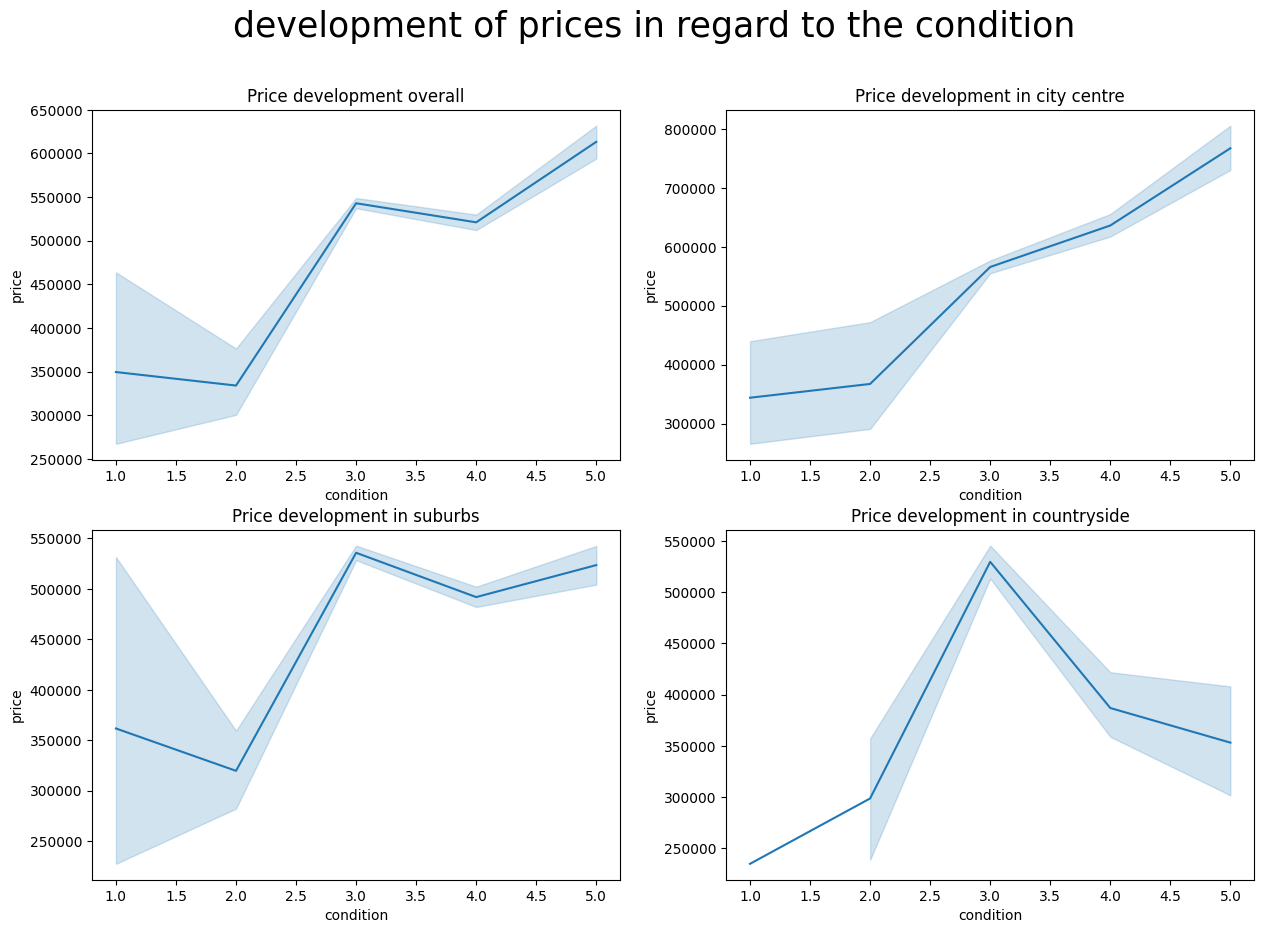

In [148]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
 
fig.suptitle('development of prices in regard to the condition', fontsize=25)
 
all = sns.lineplot(ax=axes[0, 0], data=df_housing3, x='condition',y='price')
all.title.set_text('Price development overall')

cicen = sns.lineplot(ax=axes[0, 1], data=df_citycentre, x='condition',y='price')
cicen.title.set_text('Price development in city centre')

subur = sns.lineplot(ax=axes[1, 0], data=df_suburbs, x='condition',y='price')
subur.title.set_text('Price development in suburbs')

counsi = sns.lineplot(ax=axes[1, 1], data=df_countryside, x='condition',y='price')
counsi.title.set_text('Price development in countryside')

On the countryside, houses in a mediocre condition are the most expensive! Better look for higher ratings there. 

Now have a look at the view and price relationship. I assume the better the view, the higher the price. No matter where. :)

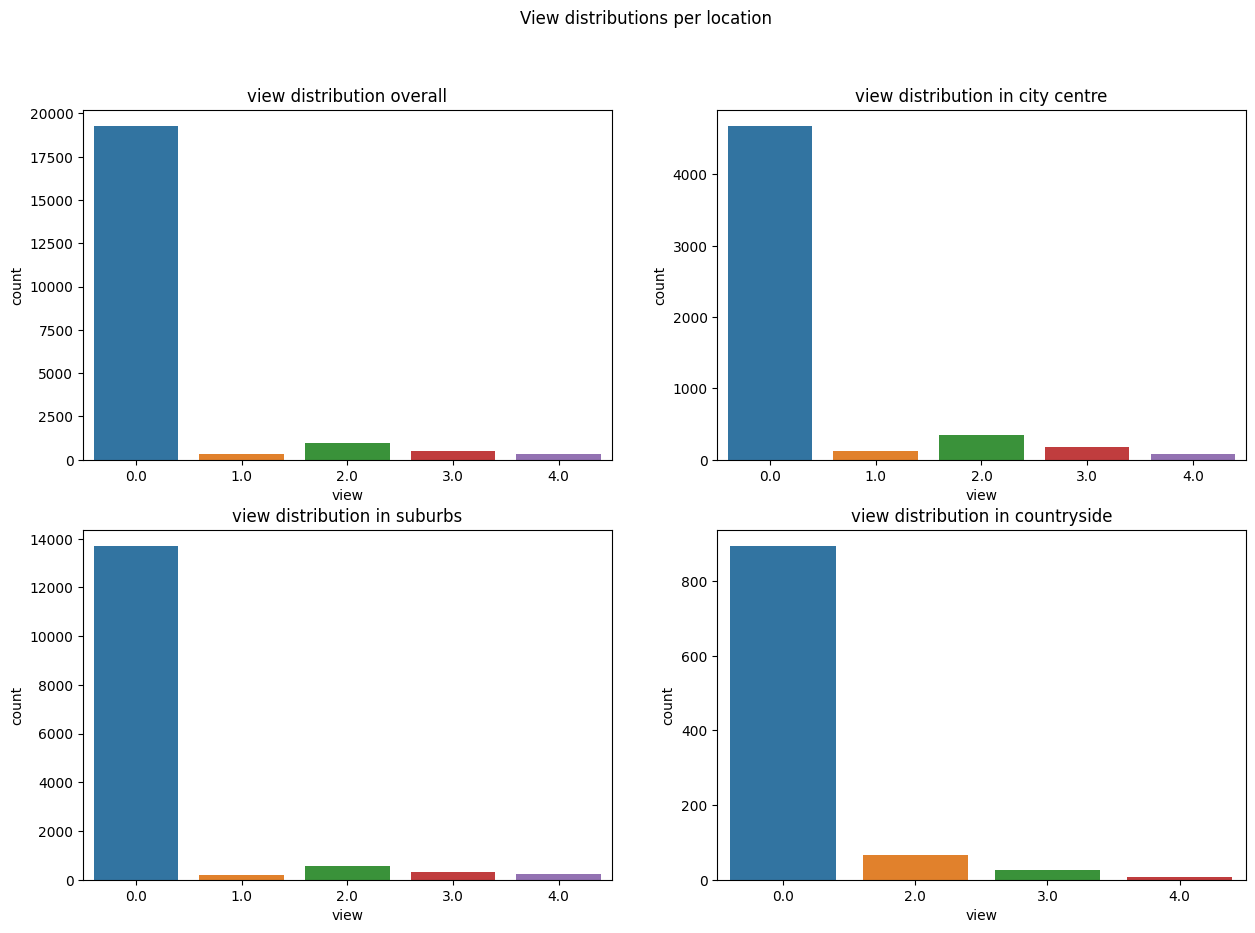

In [149]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
 
fig.suptitle('View distributions per location')
 
all = sns.countplot(ax=axes[0, 0], x='view', data=df_housing3)
all.title.set_text('view distribution overall')

cicen = sns.countplot(ax=axes[0, 1], x='view', data=df_citycentre)
cicen.title.set_text('view distribution in city centre')

subur = sns.countplot(ax=axes[1, 0], x='view', data=df_suburbs)
subur.title.set_text('view distribution in suburbs')

counsi = sns.countplot(ax=axes[1, 1], x='view', data=df_countryside)
counsi.title.set_text('view distribution in countryside')

Assuming that most view-ratings are not as bad as it seems here, I will guess that we just don't have this data for most of the houses.

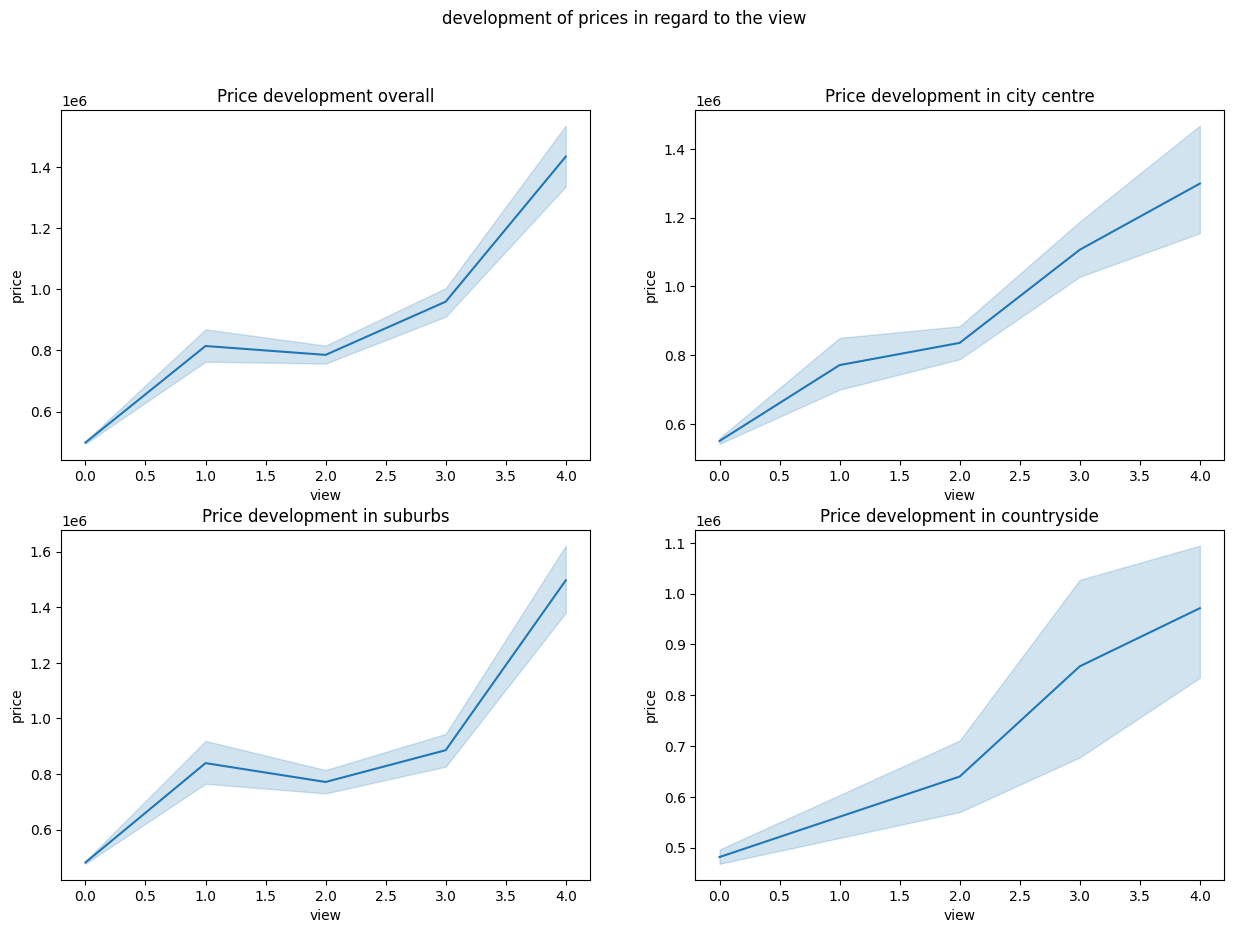

In [150]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
 
fig.suptitle('development of prices in regard to the view')
 
all = sns.lineplot(ax=axes[0, 0], data=df_housing3, x='view',y='price')
all.title.set_text('Price development overall')

cicen = sns.lineplot(ax=axes[0, 1], data=df_citycentre, x='view',y='price')
cicen.title.set_text('Price development in city centre')

subur = sns.lineplot(ax=axes[1, 0], data=df_suburbs, x='view',y='price')
subur.title.set_text('Price development in suburbs')

counsi = sns.lineplot(ax=axes[1, 1], data=df_countryside, x='view',y='price')
counsi.title.set_text('Price development in countryside')

And since we do not have view data for most of the houses, it is interesting to see that once we have it, it does impact the price. Would we a good tip for realtors to get the view of their portfolios checked and published. ;)

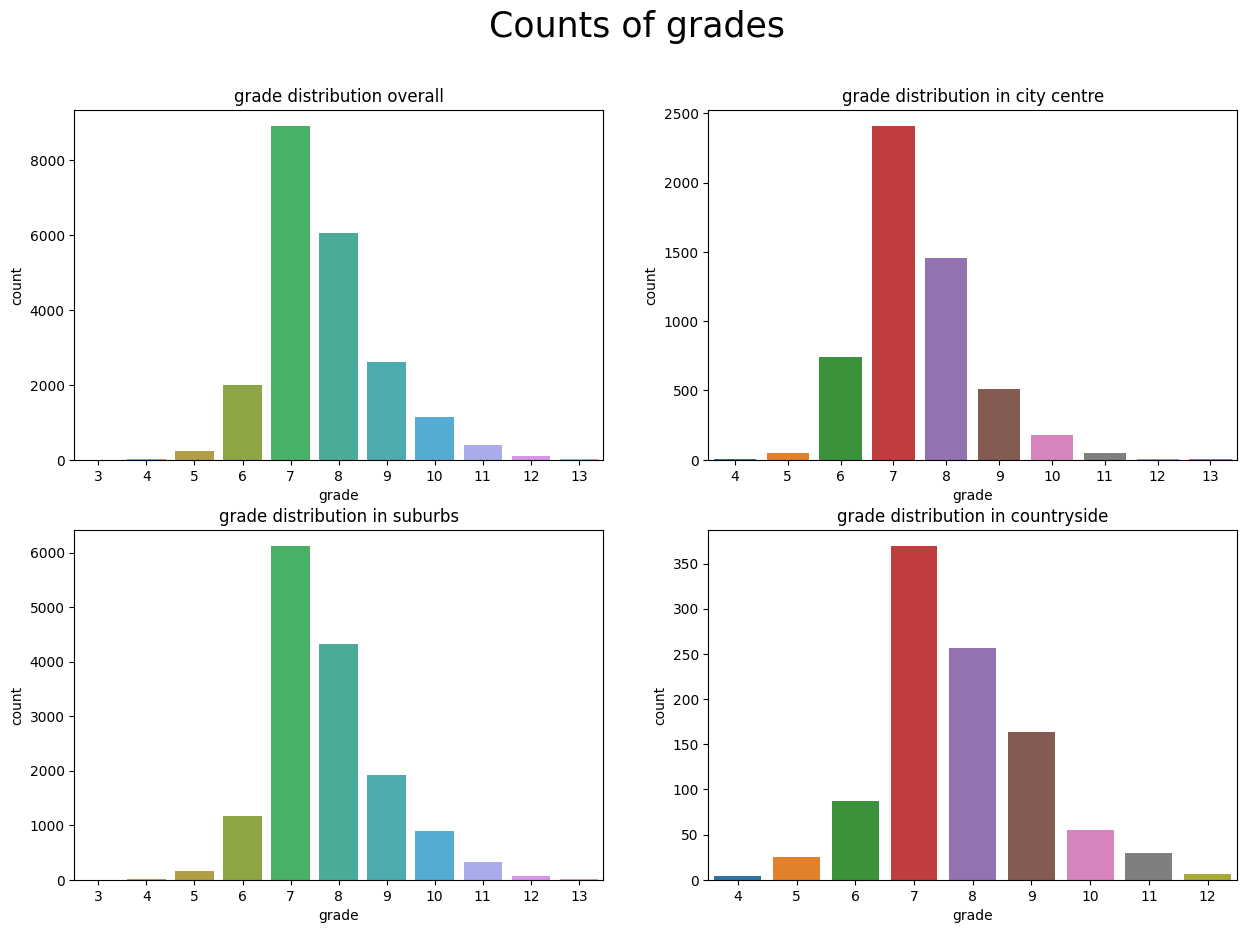

In [151]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
 
fig.suptitle('Counts of grades', fontsize = 25)
 
all = sns.countplot(ax=axes[0, 0], x='grade', data=df_housing3)
all.title.set_text('grade distribution overall')

cicen = sns.countplot(ax=axes[0, 1], x='grade', data=df_citycentre)
cicen.title.set_text('grade distribution in city centre')

subur = sns.countplot(ax=axes[1, 0], x='grade', data=df_suburbs)
subur.title.set_text('grade distribution in suburbs')

counsi = sns.countplot(ax=axes[1, 1], x='grade', data=df_countryside)
counsi.title.set_text('grade distribution in countryside')

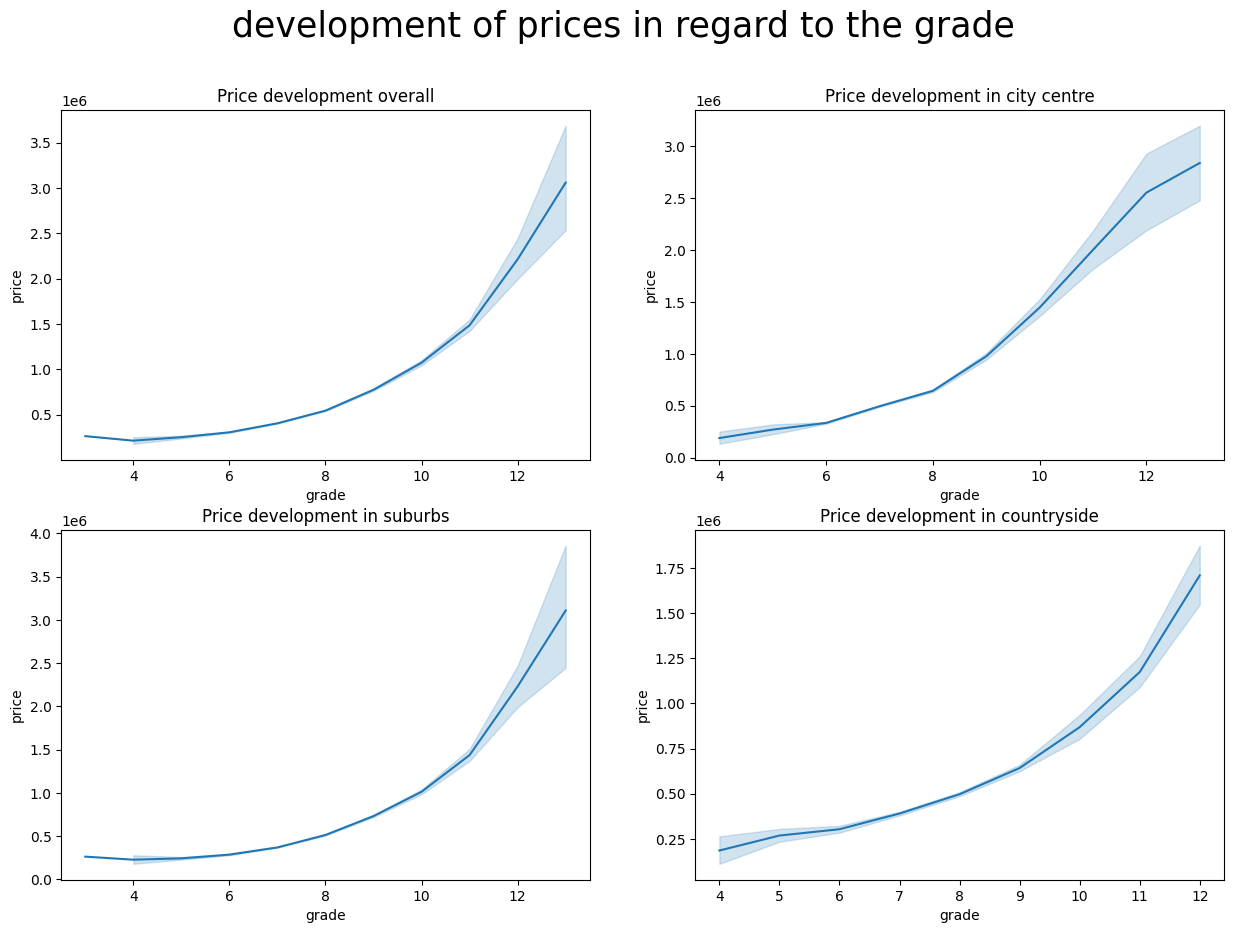

In [152]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
 
fig.suptitle('development of prices in regard to the grade', fontsize = 25)
 
all = sns.lineplot(ax=axes[0, 0], data=df_housing3, x='grade',y='price')
all.title.set_text('Price development overall')

cicen = sns.lineplot(ax=axes[0, 1], data=df_citycentre, x='grade',y='price')
cicen.title.set_text('Price development in city centre')

subur = sns.lineplot(ax=axes[1, 0], data=df_suburbs, x='grade',y='price')
subur.title.set_text('Price development in suburbs')

counsi = sns.lineplot(ax=axes[1, 1], data=df_countryside, x='grade',y='price')
counsi.title.set_text('Price development in countryside')

## Finding the right houses for the client

I will now subset the data further: 
- for df_citycentre: 
    - 1-3 bedrooms
    - 1-3 bathrooms
    - high rating 
- for df_countryside:
    - not renovated
    - 2-3 bedrooms
    - 2-3 bathrooms
    - built before 2008 (if renovation is planned as project)
    - not renovated since 1995
    


Let's start with df_citycentre

In [153]:
df_houses_city = df_citycentre[(df_citycentre.grade > 8) & (df_citycentre.bedrooms < 3) & (df_citycentre.bathrooms < 3)]
df_houses_city.count()

id               49
bedrooms         49
bathrooms        49
sqft_living      49
sqft_lot         49
floors           49
waterfront       38
view             49
condition        49
grade            49
sqft_above       49
sqft_basement    46
yr_built         49
yr_renovated     41
zipcode          49
lat              49
long             49
sqft_living15    49
sqft_lot15       49
date             49
price            49
countryside      49
city_centre      49
suburbs          49
location         49
year_sold        49
month_sold       49
weekday_sold     49
dtype: int64

And the countryside. Since the client stated he wants an un-renovated house in the countryside, I am assuming he wants to either renovate it himself as a weekend project or wants to have the total say in how it get renewed. Therefore, I will exclude all houses built or renovated after 1995. And since we found out that higher ratings for condition in the countryside don't mean the price is higher too, I will filter for the best rating. 

In [154]:
#df_countryside['year_built'] = df_countryside['yr_built'].astype(int)
#df_countryside['year_renovated'] = df_countryside['yr_renovated'].astype(int)
#df_countryside['yr_renovated'].dtypes

df_houses_country = df_countryside[(df_countryside.yr_built < 1995) & (df_countryside.yr_renovated < 1995) & (df_countryside.bedrooms > 2) & (df_countryside.bathrooms > 1) & (df_countryside.condition > 3) & (df_countryside.grade > 6)]
df_houses_country.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,long,sqft_living15,sqft_lot15,price,countryside,city_centre,suburbs,year_sold,month_sold,weekday_sold
count,59.00,59.00,59.00,59.00,59.00,59.00,58.00,59.00,59.00,59.00,...,59.00,59.00,59.00,59.00,59.00,59.00,59.00,59.00,59.00,59.00
mean,"4,022,100,101.51",3.47,2.17,"2,200.00","76,494.78",1.33,0.00,0.27,4.19,7.37,...,-121.86,"1,805.02","70,059.56","437,255.08",1.00,0.00,0.00,"2,014.31",6.20,2.02
std,"2,932,222,535.55",0.68,0.56,825.62,"106,562.69",0.43,0.00,0.76,0.39,0.64,...,0.11,414.28,"85,443.92","202,524.29",0.00,0.00,0.00,0.46,2.75,1.58
min,"203,900,610.00",3.00,1.50,980.00,"9,300.00",1.00,0.00,0.00,4.00,7.00,...,-121.97,930.00,"9,576.00","213,000.00",1.00,0.00,0.00,"2,014.00",1.00,0.00
25%,"1,323,584,133.00",3.00,1.75,"1,630.00","13,244.50",1.00,0.00,0.00,4.00,7.00,...,-121.95,"1,560.00","12,178.00","335,000.00",1.00,0.00,0.00,"2,014.00",4.00,1.00
50%,"3,220,079,017.00",3.00,2.00,"1,990.00","22,445.00",1.00,0.00,0.00,4.00,7.00,...,-121.90,"1,710.00","35,910.00","380,000.00",1.00,0.00,0.00,"2,014.00",6.00,2.00
75%,"7,334,400,555.00",4.00,2.50,"2,505.00","91,363.00",1.75,0.00,0.00,4.00,8.00,...,-121.78,"2,070.00","96,354.50","489,500.00",1.00,0.00,0.00,"2,015.00",7.50,3.00
max,"9,413,400,165.00",6.00,3.75,"4,750.00","478,288.00",2.00,0.00,3.00,5.00,10.00,...,-121.32,"2,960.00","360,000.00","1,650,000.00",1.00,0.00,0.00,"2,015.00",12.00,6.00


Now I have 49 houses in the city centre and 26 houses in the countryside to propose. Still quiet a lot. Let's find the house in the city center with the best grading, the best view and a good price. 

First, let's find the best propertties in the city centre. 

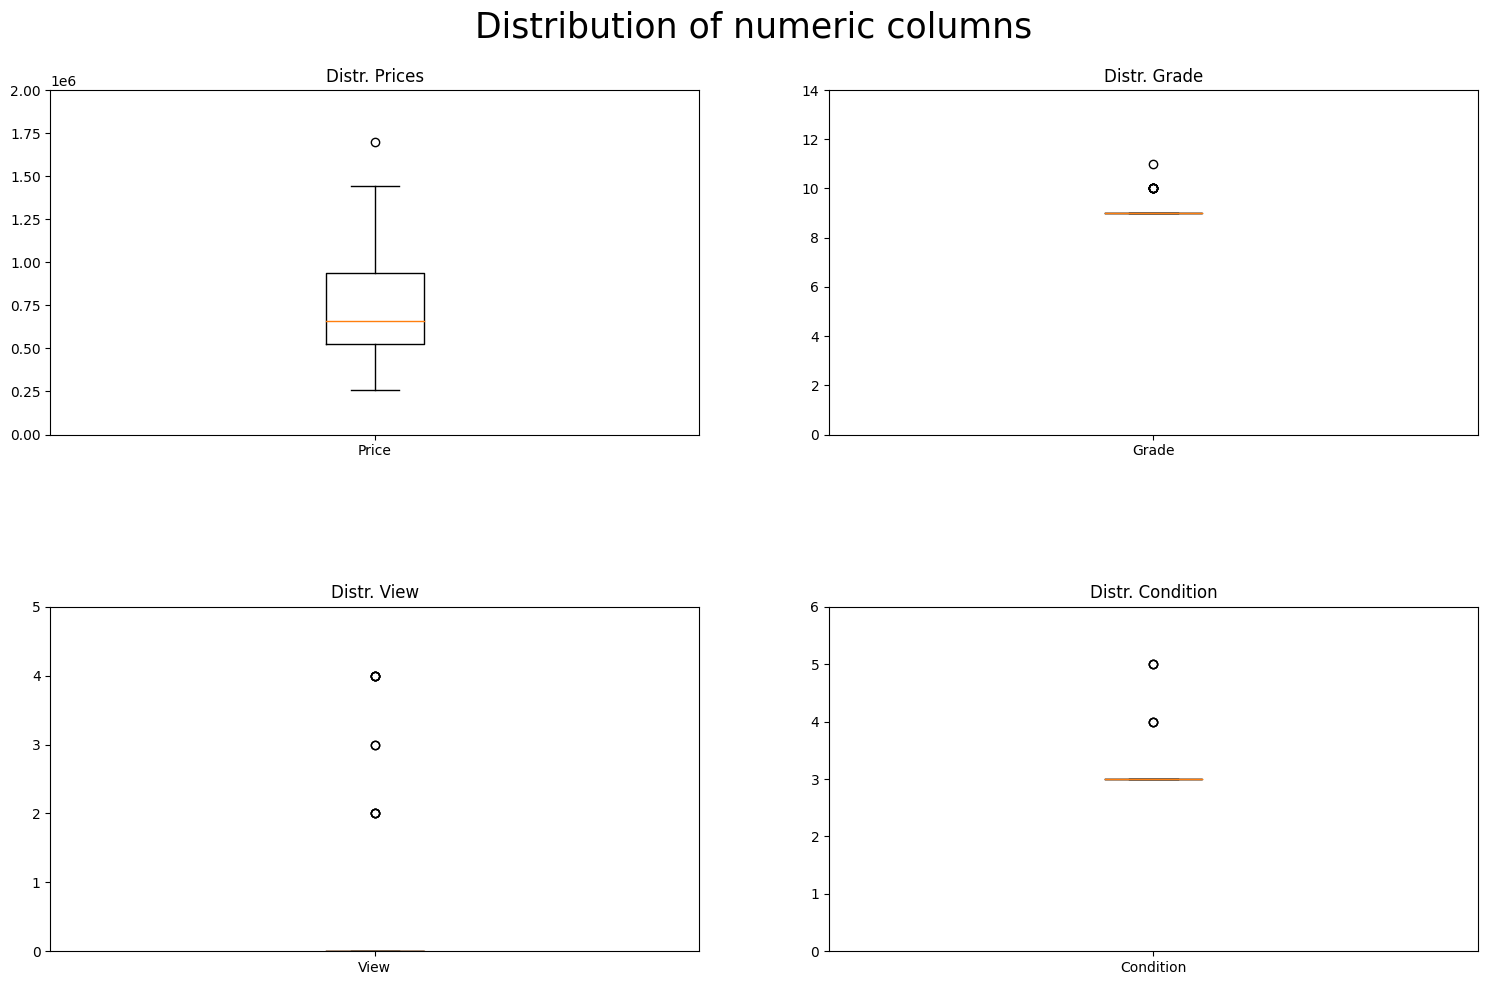

In [155]:
fig, ax = plt.subplots(2,2, figsize=(15,10)) # create subplots on 2 rows and 3 columns
plt.suptitle('Distribution of numeric columns', fontsize=25)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots


ax[0][0].boxplot(x = df_houses_city['price']) 
ax[0][0].set_xticklabels(labels=["Price"]) # sets the label for the ticks on the x-axis
ax[0][0].set_ylim(0,2000000) # limits the y-axis values from 0 to 2000000 
ax[0][0].set_title("Distr. Prices", fontsize = 12); # sets title for subplot

ax[0][1].boxplot(x = df_houses_city['grade'])  
ax[0][1].set_xticklabels(labels=["Grade"]) 
ax[0][1].set_ylim(0,14) 
ax[0][1].set_title("Distr. Grade", fontsize = 12); 

ax[1][0].boxplot(x = df_houses_city['view']) 
ax[1][0].set_xticklabels(labels=["View"]) 
ax[1][0].set_ylim(0,5) 
ax[1][0].set_title("Distr. View", fontsize = 12); 

ax[1][1].boxplot(x = df_houses_city['condition']) 
ax[1][1].set_xticklabels(labels=["Condition"]) 
ax[1][1].set_ylim(0,6) 
ax[1][1].set_title("Distr. Condition", fontsize = 12); 

In [156]:
df_houses_city[(df_houses_city.grade == 11)]

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,date,price,countryside,city_centre,suburbs,location,year_sold,month_sold,weekday_sold
20049,2559950110,2.00,2.50,"2,470.00",609.00,3.00,0.00,0.00,3,11,...,"1,229.00",2015-04-22,"1,230,000.00",0,1,0,city_centre,2015,4,2


The house with ID 2559950110 has the best grading. Condition is only 3, view 0 and price is 1.23 million. 

In [157]:
df_houses_city[(df_houses_city.condition == 5)]

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,date,price,countryside,city_centre,suburbs,location,year_sold,month_sold,weekday_sold
2584,5457800930,2.00,2.25,"3,170.00","3,000.00",2.00,NaN,2.00,5,10,...,"5,061.00",2014-06-13,"1,700,000.00",0,1,0,city_centre,2014,6,4
10536,8925100115,2.00,2.25,"2,320.00","9,300.00",1.50,0.00,4.00,5,9,...,"9,300.00",2014-10-15,"1,150,000.00",0,1,0,city_centre,2014,10,2
19790,284000025,2.00,2.00,"2,180.00","18,525.00",1.00,1.00,4.00,5,9,...,"21,503.00",2015-04-20,"1,410,000.00",0,1,0,city_centre,2015,4,0


House with ID 284000025 offers waterfront view, a good condition (5), good grading (5) and a great view (4) for 1.41 million. 

In [158]:
df_houses_city[(df_houses_city.price < 600000)]

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,date,price,countryside,city_centre,suburbs,location,year_sold,month_sold,weekday_sold
2290,9523100459,2.00,2.50,"1,380.00",951.00,3.00,NaN,0.00,3,9,...,"3,400.00",2014-06-09,"552,000.00",0,1,0,city_centre,2014,6,0
2482,9828702310,2.00,1.50,"1,295.00","1,093.00",2.00,0.00,0.00,3,9,...,"1,413.00",2014-06-11,"487,028.00",0,1,0,city_centre,2014,6,2
2778,9523100458,2.00,2.50,"1,380.00",953.00,3.00,0.00,0.00,3,9,...,"3,400.00",2014-06-17,"549,000.00",0,1,0,city_centre,2014,6,1
3767,688000017,1.00,1.25,"1,100.00",638.00,3.00,NaN,0.00,3,9,...,"1,933.00",2014-06-27,"516,500.00",0,1,0,city_centre,2014,6,4
5158,7600136,2.00,2.00,"1,130.00","1,148.00",2.00,NaN,0.00,3,9,...,"1,201.00",2014-07-18,"411,000.00",0,1,0,city_centre,2014,7,4
7725,2770601530,2.00,2.25,"1,570.00","1,269.00",2.00,NaN,0.00,3,9,...,"6,000.00",2014-08-26,"500,000.00",0,1,0,city_centre,2014,8,1
8127,955000430,2.00,1.25,"1,230.00","1,569.00",2.00,0.00,0.00,3,9,...,"1,230.00",2014-09-03,"540,000.00",0,1,0,city_centre,2014,9,2
8317,1604601572,2.00,2.25,860.00,696.00,2.00,0.00,0.00,3,9,...,"3,000.00",2014-09-05,"345,000.00",0,1,0,city_centre,2014,9,4
8323,1604601570,2.00,2.25,"1,100.00","1,695.00",2.00,0.00,0.00,3,9,...,"3,082.00",2014-09-05,"374,000.00",0,1,0,city_centre,2014,9,4
9316,8850000509,2.00,1.50,"1,620.00","1,444.00",2.00,0.00,0.00,3,9,...,"1,642.00",2014-09-23,"525,000.00",0,1,0,city_centre,2014,9,1


Between houses of price around 300000 und houses of price around 600000 is not a huge difference. If money plays a role, there are decent places about 260,000. 

Now find the right place in the countryside: 

(0.0, 6.0)

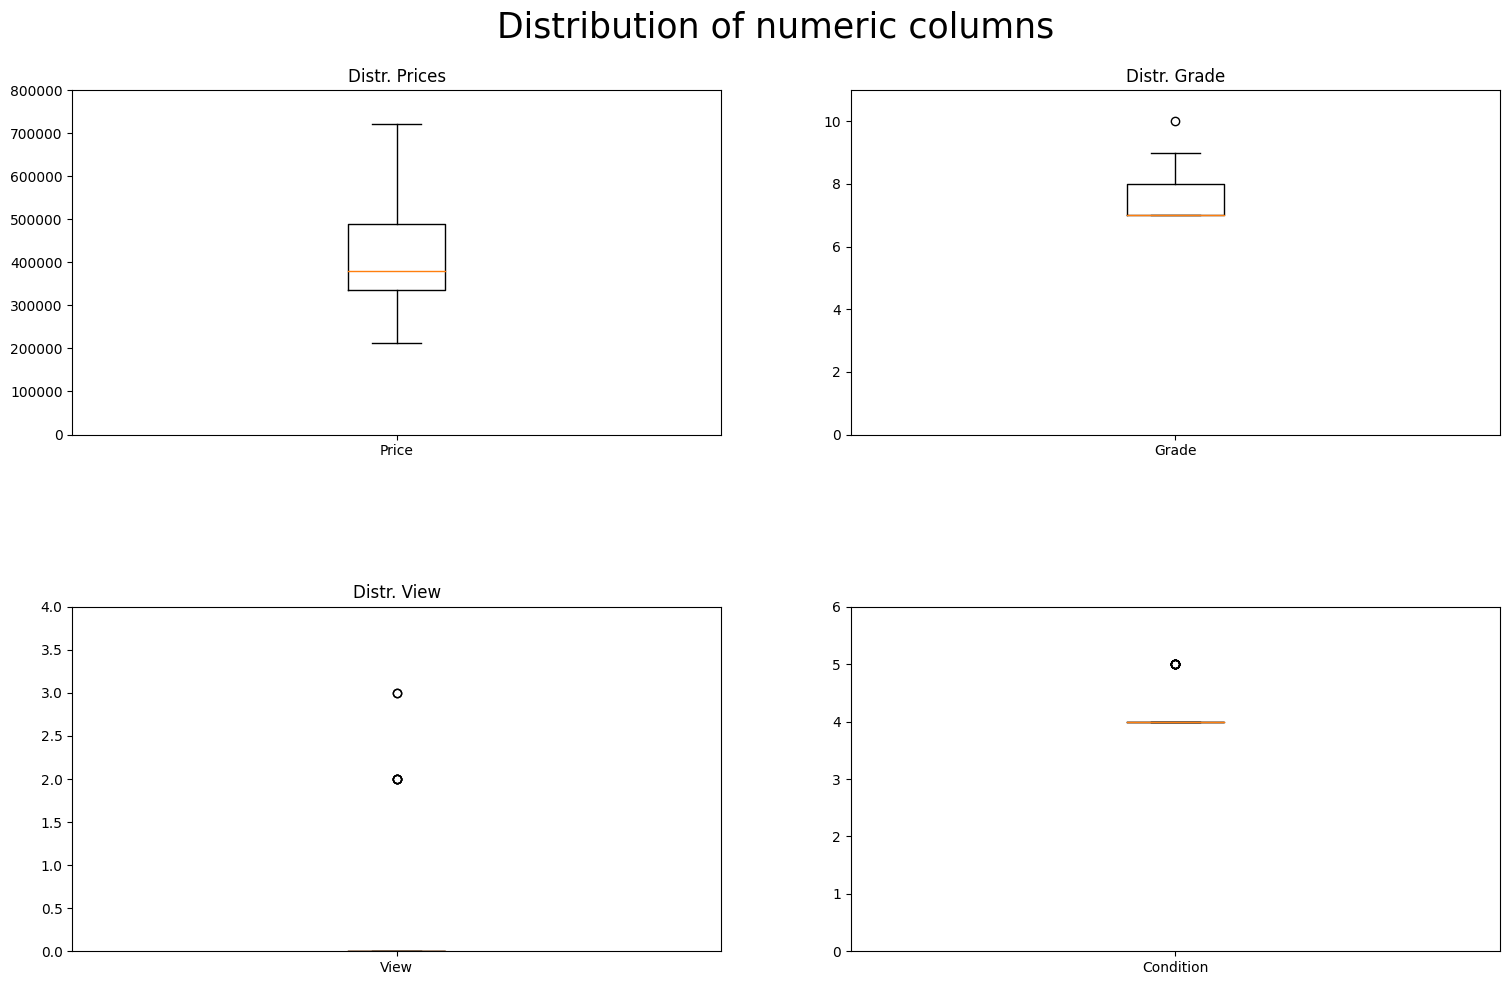

In [159]:
fig, ax = plt.subplots(2,2, figsize=(15,10)) # create subplots on 2 rows and 3 columns
plt.suptitle('Distribution of numeric columns', fontsize=25)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots


ax[0][0].boxplot(x = df_houses_country['price']) 
ax[0][0].set_xticklabels(labels=["Price"]) # sets the label for the ticks on the x-axis
ax[0][0].set_ylim(0,800000) # limits the y-axis values from 0 to 2000000 
ax[0][0].set_title("Distr. Prices", fontsize = 12); # sets title for subplot

ax[0][1].boxplot(x = df_houses_country['grade'])  
ax[0][1].set_xticklabels(labels=["Grade"]) 
ax[0][1].set_ylim(0,11) 
ax[0][1].set_title("Distr. Grade", fontsize = 12); 

ax[1][0].boxplot(x = df_houses_country['view']) 
ax[1][0].set_xticklabels(labels=["View"]) 
ax[1][0].set_ylim(0,4) 
ax[1][0].set_title("Distr. View", fontsize = 12); 

ax[1][1].boxplot(x = df_houses_country['condition']) 
ax[1][1].set_xticklabels(labels=["Condition"]) 
ax[1][1].set_ylim(0,6) 

In [166]:
df_houses_country[(df_houses_country.grade >= 8) & (df_houses_country.condition > 4)]

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,date,price,countryside,city_centre,suburbs,location,year_sold,month_sold,weekday_sold
4185,7802900224,5.00,2.50,"2,860.00","68,519.00",2.00,0.00,0.00,5,8,...,"35,910.00",2014-07-07,"670,000.00",1,0,0,countryside,2014,7,0


In [168]:
df_houses_country[(df_houses_country.grade > 8) & (df_houses_country.condition > 3)]

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,date,price,countryside,city_centre,suburbs,location,year_sold,month_sold,weekday_sold
1810,619079016,4.00,3.25,"4,400.00","186,846.00",2.00,0.00,0.00,4,9,...,"186,846.00",2014-06-02,"687,000.00",1,0,0,countryside,2014,6,0
3933,6055000310,3.00,2.50,"3,660.00","39,478.00",2.00,0.00,2.00,4,9,...,"38,312.00",2014-07-01,"530,000.00",1,0,0,countryside,2014,7,1
18599,1824079052,4.00,3.25,"4,200.00","210,394.00",2.00,0.00,0.00,4,10,...,"184,694.00",2015-04-01,"1,650,000.00",1,0,0,countryside,2015,4,2


House with ID 6055000310 brings everything you could wish for from a green getaway. Enough bedrooms (3) and bathrooms (2,5) to host guests, a great grading (9), decent condition with potential (4) and there is a view (2)! All for 530,000, which is a fair price. 